In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/instquality/")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/instquality/")

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Check files

In [94]:
sorted(glob.glob(os.path.join(output_dir, "*levels_t0_*results.dat")))

['specs/elastic_levels_t0_80_agn_l1_0.25_clust_results.dat',
 'specs/elastic_levels_t0_80_agn_l1_0.5_clust_results.dat',
 'specs/elastic_levels_t0_80_agn_l1_0.75_clust_results.dat',
 'specs/elastic_levels_t0_85_agn_l1_0.25_clust_results.dat',
 'specs/elastic_levels_t0_85_agn_l1_0.5_clust_results.dat',
 'specs/elastic_levels_t0_85_agn_l1_0.75_clust_results.dat',
 'specs/elastic_levels_t0_agn_l1_0.25_clust_results.dat',
 'specs/elastic_levels_t0_agn_l1_0.5_clust_results.dat',
 'specs/elastic_levels_t0_agn_l1_0.75_clust_results.dat',
 'specs/lasso_levels_t0_80_agn_clust_results.dat',
 'specs/lasso_levels_t0_85_agn_clust_results.dat',
 'specs/lasso_levels_t0_agn_clust_results.dat',
 'specs/ridge_levels_t0_80_agn_clust_results.dat',
 'specs/ridge_levels_t0_85_agn_clust_results.dat',
 'specs/ridge_levels_t0_agn_clust_results.dat']

### Summary

In [3]:
# incremental signal regressions across 1 to 10 year horizon

from functions.summary import get_benchmark_stats, print_temporal_signal_stats

import pandas as pd

df = pd.read_pickle("saved/df.dat")

benchmark_df_75 = get_benchmark_stats(df, 0.75)
benchmark_df_80 = get_benchmark_stats(df, 0.80)
benchmark_df_85 = get_benchmark_stats(df, 0.85)

benchmark_dfs = {
    0.75: benchmark_df_75,
    0.80: benchmark_df_80,
    0.85: benchmark_df_85
}

print_temporal_signal_stats(
    specs_dir="specs",
    base_name="signal",
    models=["ridge", "lasso", "elastic"],
    benchmark_dfs=benchmark_dfs
)



----------------------------------------------------------------------------------------------------------------------------------
                                     75-25 TRAIN-TEST SET SPLIT                                     
----------------------------------------------------------------------------------------------------------------------------------

>>> RIDGE
----------------------------------------------------------------------------------------------------------------------------------
 horizon R²_test RMSE_test ΔR² vs Benchmark (p.p.) ΔRMSE vs Benchmark (bps) H1=Equal predictive accuracy (DM test) DM_stat  DM_p
       1  0.9085    1.2651                   +0.11                     -0.8                               Rejected    1.03 0.303
       2  0.7969    1.8737                   +0.26                     -1.2                               Rejected    1.32 0.186
       3  0.7670    1.9231                   +0.51                     -2.1                               

In [2]:
# which variables provide incremental signal?

from functions.summary import summarise_temporal_signal_vars
from functions.labels import all_labels

summarise_temporal_signal_vars(
    specs_dir="specs",
    base_name="signal",
    models=["ridge", "lasso", "elastic"],
    all_labels=all_labels
)



AVERAGE SHAP IMPORTANCE BY MODEL FOR T4 (%)
                                            Label  Average Lasso (–)  Ridge (75/25)  Elastic Net (L1=0.5) (75/25)
   4D(iii). Freedom of Foreigners to Visit (0–10)    22.92         -          45.83                          0.00
                         Monetary Freedom (0–100)    15.65         -           2.21                         29.09
      Real GDP Growth (annual %, constant prices)    13.88         -           1.95                         25.81
                        Inflation (CPI, annual %)     7.33         -           0.28                         14.38
               Current Account Balance (% of GDP)     6.99         -           0.95                         13.03
         2C. Protection of Property Rights (0–10)     5.46         -           0.84                         10.07
       3B. Standard Deviation of Inflation (0–10)     2.33         -           1.00                          3.65
Social Progress Index – Basic Human Needs 

In [3]:
# prediction across splits

from functions.summary import print_temporal_stats

print("75-25 TRAIN-TEST SET SPLIT")
print("-"*125)
print_temporal_stats(summary_df_75, benchmark_df_75)
print("80-20 TRAIN-TEST SET SPLIT")
print("-"*125)
print_temporal_stats(summary_df_80, benchmark_df_80)
print("85-15 TRAIN-TEST SET SPLIT")
print("-"*125)
print_temporal_stats(summary_df_85, benchmark_df_85)

75-25 TRAIN-TEST SET SPLIT
-----------------------------------------------------------------------------------------------------------------------------
Test‑set R² by Horizon                                         Test‑set RMSE by Horizon
-----------------------------------------------------------------------------------------------------------------------------
model    elastic net L1=0.5  lasso ridge mean reversion        model    elastic net L1=0.5  lasso ridge mean reversion
horizon                                                        horizon                                                
0                     0.510  0.515 0.555              -        0                     2.934  2.920 2.796              -
1                     0.498  0.535 0.511          0.907        1                     2.969  2.857 2.932          1.273
2                     0.266  0.382 0.373          0.794        2                     3.589  3.295 3.318          1.886
3                     0.290  0.225 0.2

In [25]:
from functions.labels import all_labels
from functions.summary import summarise_priced_in_regressions

model_configs = [
    ("lasso", None),
    ("ridge", None),
    ("elastic", 0.25),
    ("elastic", 0.5),
    ("elastic", 0.75)
]

summarise_priced_in_regressions(
    specs_dir="specs",
    base_name="levels",
    suffix="",
    model_configs=model_configs,
    all_labels=all_labels,
    h=1
)

PRICED‑IN LEVEL REGRESSIONS — PERFORMANCE SUMMARY
 Horizon Split                   Model  R²_train  R²_test  RMSE_test
       0 75‑25 Elastic Net (L1 = 0.25)    0.8492   0.5086     2.9377
       0 75‑25  Elastic Net (L1 = 0.5)    0.8203   0.5097     2.9342
       0 75‑25 Elastic Net (L1 = 0.75)    0.8002   0.5175     2.9110
       0 75‑25                   Lasso    0.7904   0.5146     2.9197
       0 75‑25                   Ridge    0.7440   0.5549     2.7959
       0 80‑20 Elastic Net (L1 = 0.25)    0.8956   0.6021     2.5346
       0 80‑20  Elastic Net (L1 = 0.5)    0.8793   0.6116     2.5042
       0 80‑20 Elastic Net (L1 = 0.75)    0.8638   0.6030     2.5315
       0 80‑20                   Lasso    0.8828   0.6127     2.5007
       0 80‑20                   Ridge    0.8685   0.6231     2.4667
       0 85‑15 Elastic Net (L1 = 0.25)    0.8918   0.6327     2.4706
       0 85‑15  Elastic Net (L1 = 0.5)    0.8755   0.6389     2.4495
       0 85‑15 Elastic Net (L1 = 0.75)    0.8600   0.

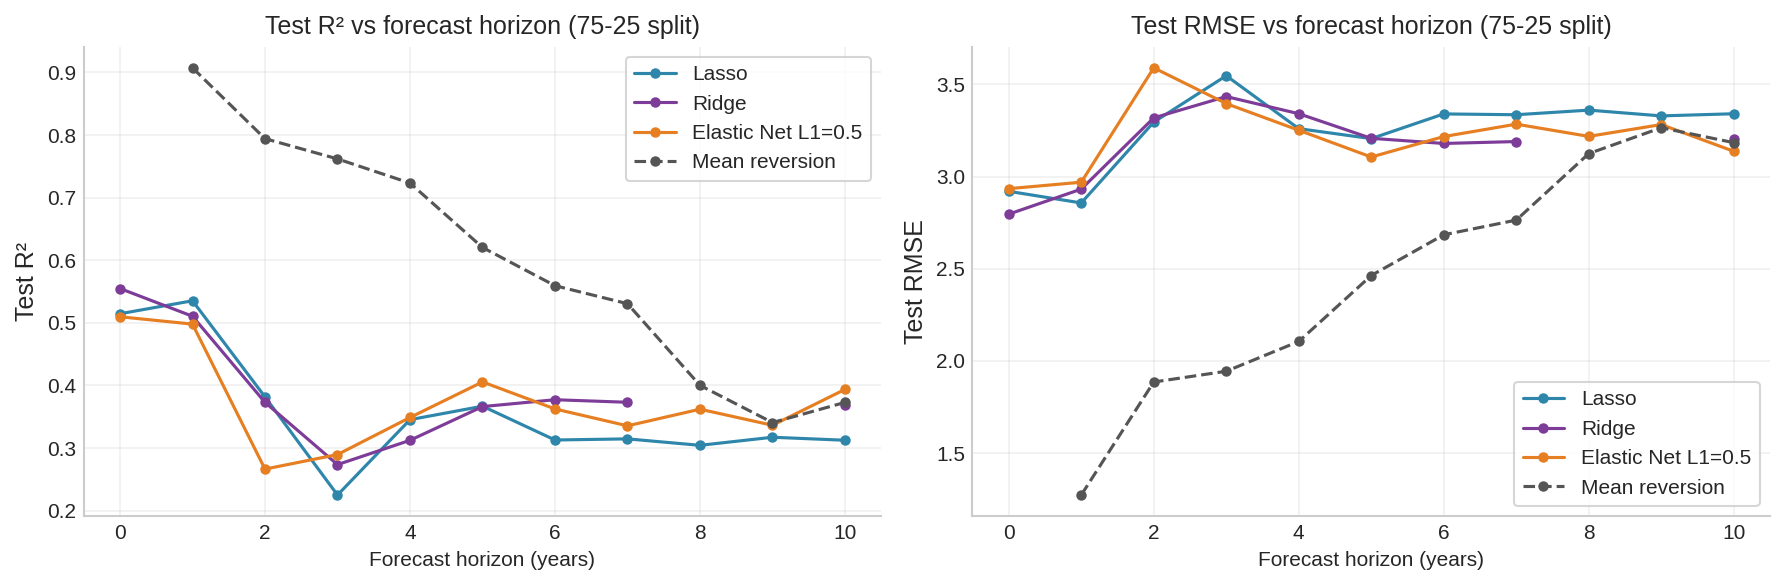

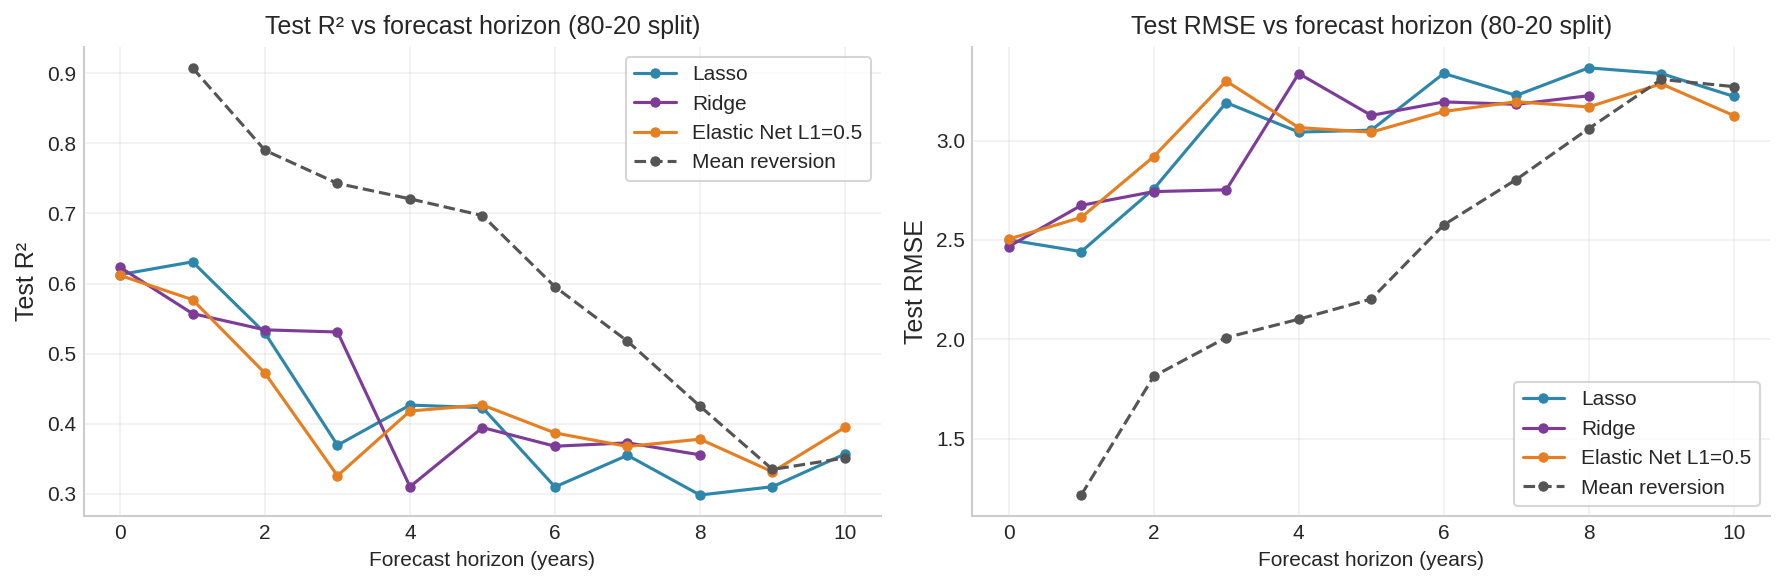

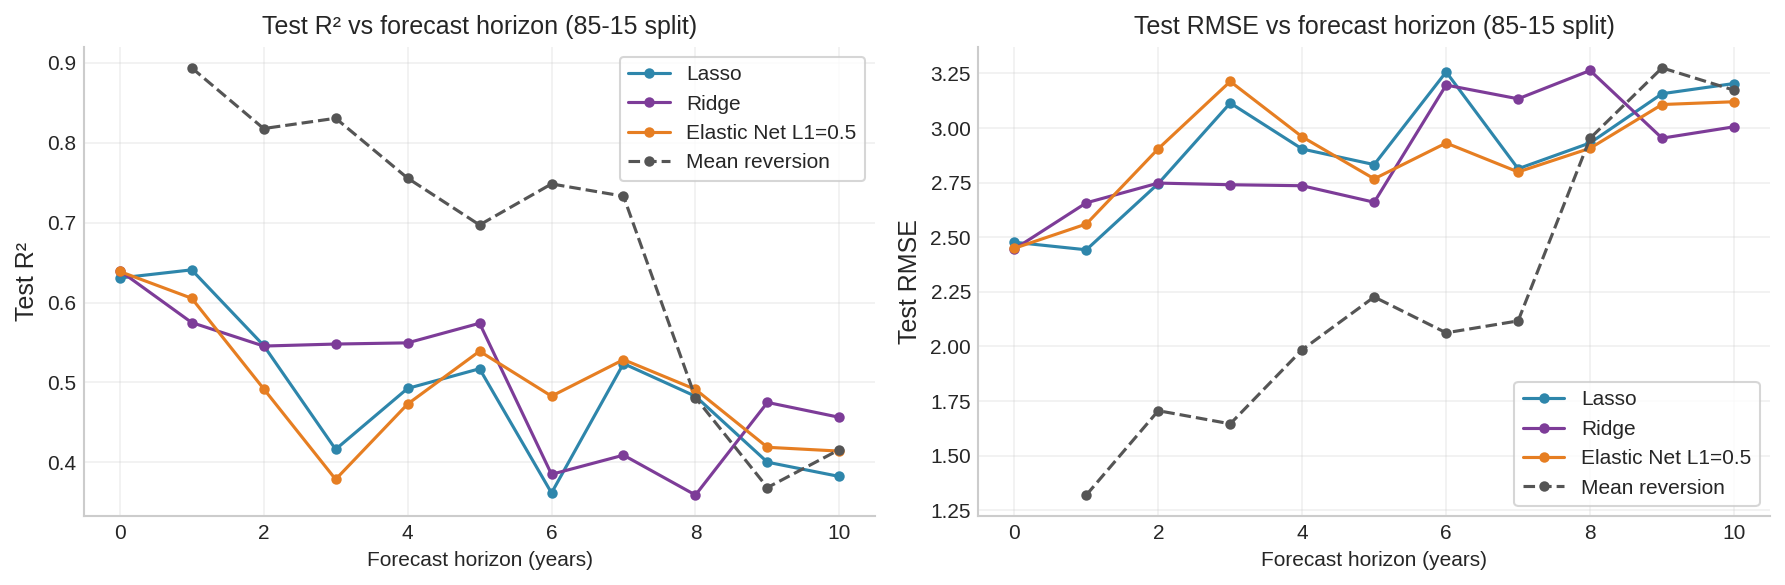

In [2]:
# compare models across splits

import pandas as pd

from functions.summary import get_prediction_stats, get_benchmark_stats, plot_temporal_stats

df = pd.read_pickle("saved/df.dat")
specs_dir = "specs"
base_name = "levels"
suffix = "_agn_clust"

summary_df_75 = get_prediction_stats(specs_dir, base_name, suffix, 0.75)
summary_df_80 = get_prediction_stats(specs_dir, base_name, suffix, 0.80)
summary_df_85 = get_prediction_stats(specs_dir, base_name, suffix, 0.85)

benchmark_df_75 = get_benchmark_stats(df, 0.75)
benchmark_df_80 = get_benchmark_stats(df, 0.80)
benchmark_df_85 = get_benchmark_stats(df, 0.85)

plot_temporal_stats(summary_df_75, benchmark_df_75, 0.75)
plot_temporal_stats(summary_df_80, benchmark_df_80, 0.8)
plot_temporal_stats(summary_df_85, benchmark_df_85, 0.85)

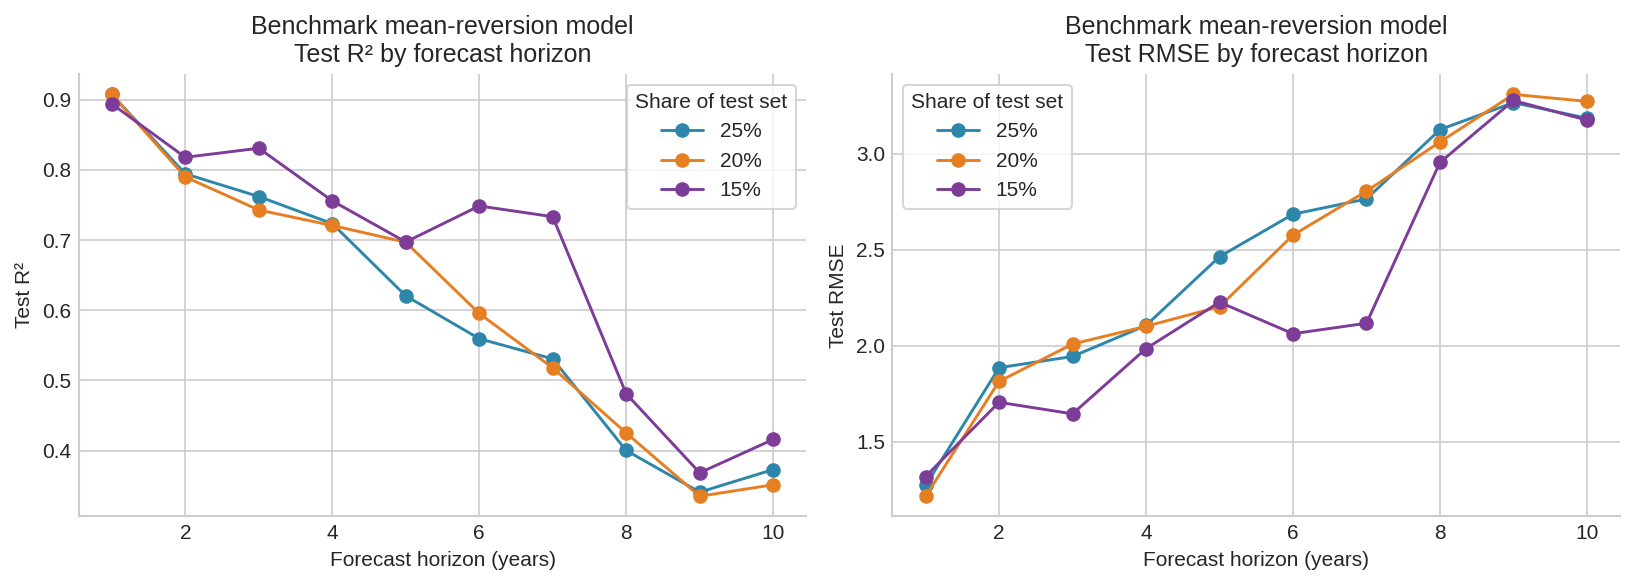

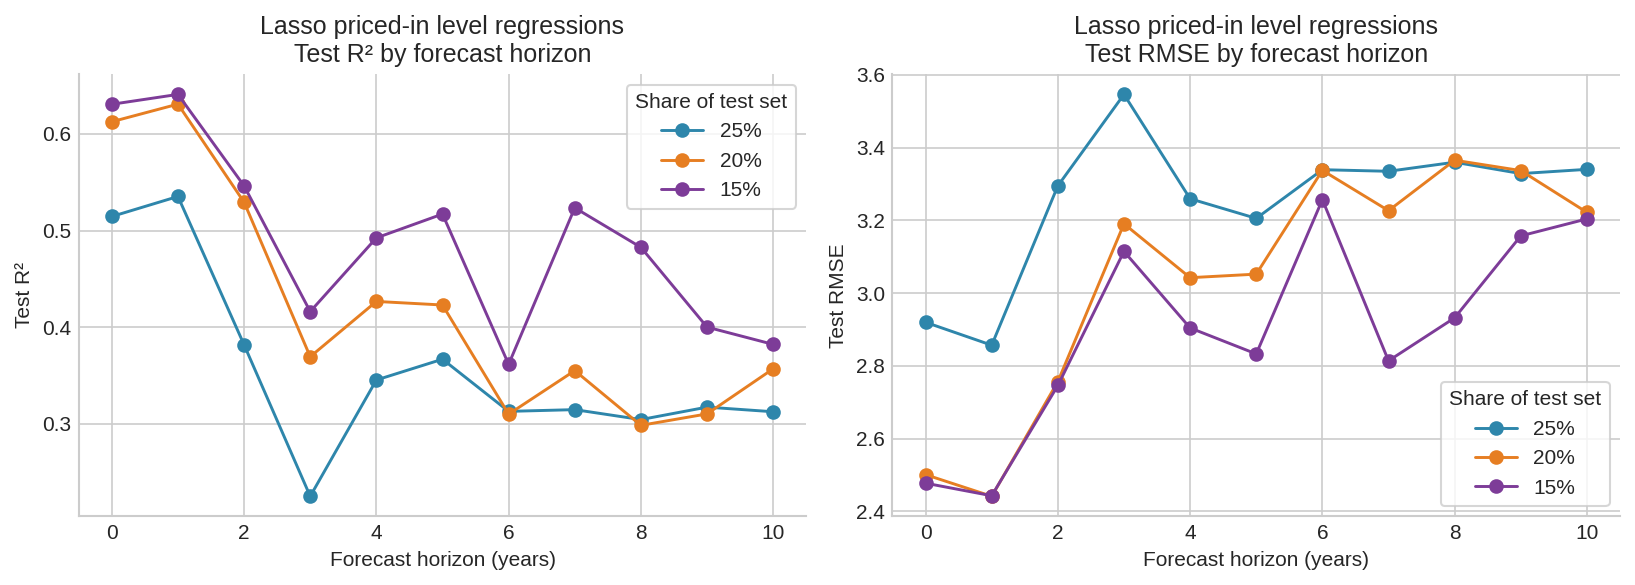

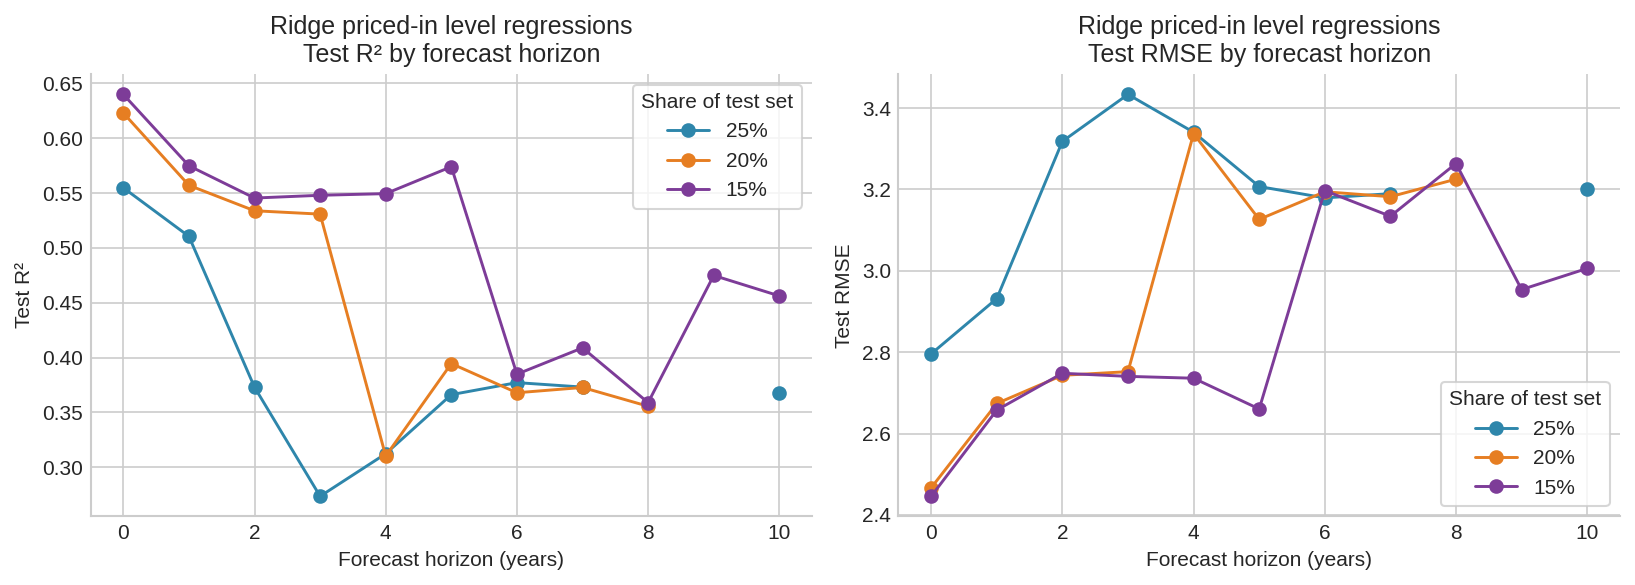

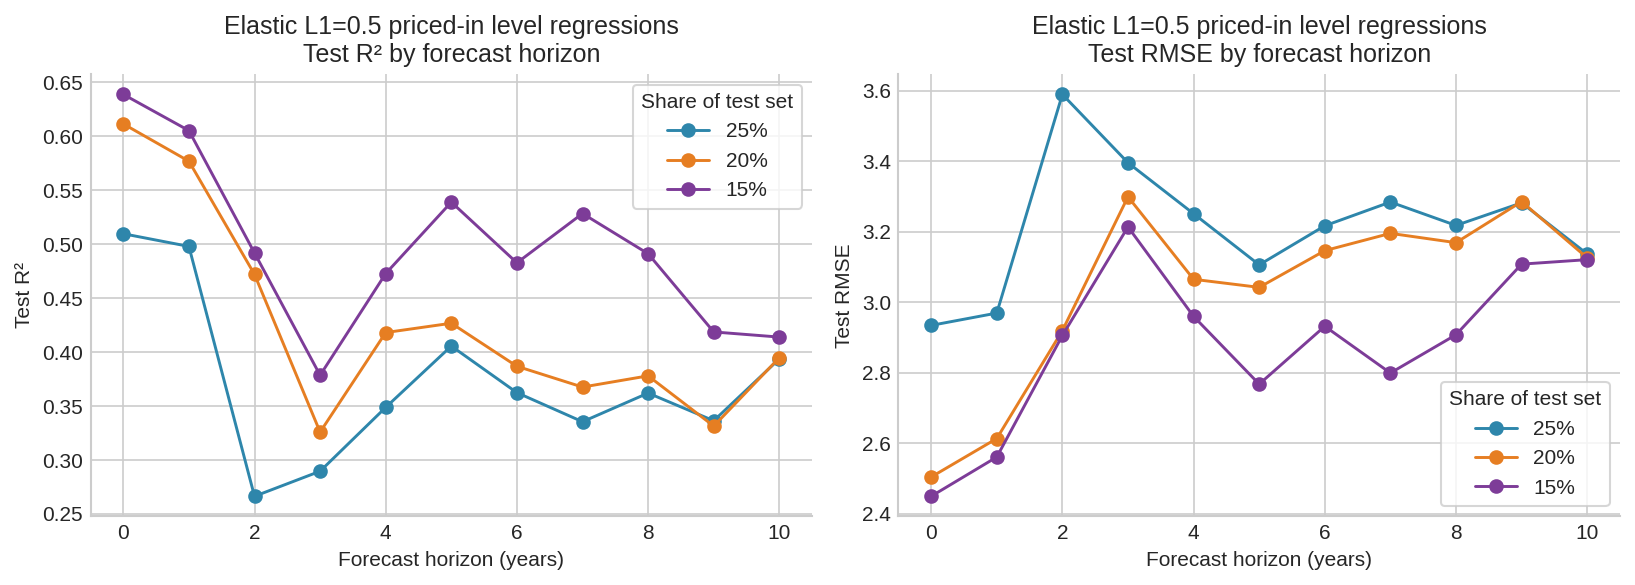

In [4]:
# compare performance across splits for each model

from functions.summary import plot_model_splits

plot_model_splits("benchmark", title_text="Benchmark mean-reversion model", df=df)
plot_model_splits("lasso_levels", "Lasso priced-in level regressions")
plot_model_splits("ridge_levels", "Ridge priced-in level regressions")
plot_model_splits("elastic_levels", "Elastic L1=0.5 priced-in level regressions")

### Function

In [26]:
import os, time
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from IPython.display import display
from joblib import Parallel, delayed
import shap
import warnings

def filter_cols(cols, exclude_endings):
    return [c for c in cols if not any(c.endswith(ending) for ending in exclude_endings)]

def _yearwise_splits(years, min_train_years=8, stride=2):
    ys = np.asarray(years)
    uniq = np.sort(np.unique(ys))
    for k in range(min_train_years, len(uniq), stride):
        train = np.where(np.isin(ys, uniq[:k]))[0]
        val = np.where(ys == uniq[k])[0]
        yield train, val

def _rmse_for_param(param, X, y, years, model_type='lasso', l1_ratio=0.5, min_train_years=8, stride=2):
    rmse = []
    if model_type == 'lasso':
        model = Lasso(alpha=param, max_iter=2000, tol=1e-3, warm_start=False)
    elif model_type == 'ridge':
        model = Ridge(alpha=param)
    elif model_type == 'elastic':
        model = ElasticNet(alpha=param, l1_ratio=l1_ratio, max_iter=2000, tol=1e-3)
    else:
        raise ValueError(f"Unknown model_type: {model_type}")
    for tr, va in _yearwise_splits(years, min_train_years, stride):
        model.fit(X.iloc[tr], y.iloc[tr])
        pred = model.predict(X.iloc[va])
        rmse.append(np.sqrt(mean_squared_error(y.iloc[va], pred)))
    return param, float(np.mean(rmse)) if rmse else np.inf

def choose_param_expanding_fast(X, y, years, model_type='lasso', l1_ratio=0.5, min_train_years=8, stride=2, n_jobs=-1):
    if model_type == 'lasso':
        alphas = np.logspace(-4, 1, 20)
        cv_folds = []
        for tr, va in _yearwise_splits(years, min_train_years, stride):
            cv_folds.append((tr, va))

        if len(cv_folds) > 0:
            lasso_cv = LassoCV(alphas=alphas, cv=cv_folds, max_iter=2000, tol=1e-3, n_jobs=n_jobs)
            lasso_cv.fit(X, y)
            return lasso_cv.alpha_

    elif model_type == 'elastic':
        alphas = np.logspace(-4, 1, 20)
        cv_folds = []
        for tr, va in _yearwise_splits(years, min_train_years, stride):
            cv_folds.append((tr, va))

        if len(cv_folds) > 0:
            elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=[l1_ratio], cv=cv_folds,
                                    max_iter=2000, tol=1e-3, n_jobs=n_jobs)
            elastic_cv.fit(X, y)
            return elastic_cv.alpha_

    params_coarse = np.logspace(0, 5, 15) if model_type == 'ridge' else np.logspace(-4, 1, 12)
    coarse = Parallel(n_jobs=n_jobs)(
        delayed(_rmse_for_param)(p, X, y, years, model_type, l1_ratio, min_train_years, stride)
        for p in sorted(params_coarse, reverse=True)
    )
    p0 = min(coarse, key=lambda t: t[1])[0]
    low, high = p0/5, p0*5
    fine_grid = np.logspace(np.log10(low), np.log10(high), 8)
    fine = Parallel(n_jobs=n_jobs)(
        delayed(_rmse_for_param)(p, X, y, years, model_type, l1_ratio, min_train_years, stride)
        for p in sorted(fine_grid, reverse=True)
    )
    return min(fine, key=lambda t: t[1])[0]

def _fit_model_for_factor(factor, optimal_param, X_train, X_test, y_train_adj, y_test_adj,
                         y_train, y_test, spread_train, spread_test, model_type, l1_ratio, agnostic):
    param = optimal_param * factor
    if model_type == 'lasso':
        model = Lasso(alpha=param, max_iter=2000, tol=1e-3)
    elif model_type == 'ridge':
        model = Ridge(alpha=param)
    elif model_type == 'elastic':
        model = ElasticNet(alpha=param, l1_ratio=l1_ratio, max_iter=2000, tol=1e-3)

    model.fit(X_train, y_train_adj)
    y_pred_test_adj = model.predict(X_test)
    y_pred_train_adj = model.predict(X_train)

    if not agnostic:
        y_pred_test = spread_test + y_pred_test_adj
        y_pred_train = spread_train + y_pred_train_adj
    else:
        y_pred_test = y_pred_test_adj
        y_pred_train = y_pred_train_adj

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    active_vars = np.sum(model.coef_ != 0)

    if not agnostic:
        e_benchmark = y_test - spread_test
        e_model = y_test - y_pred_test
        dm_stat, dm_p = _dm_test(e_benchmark, e_model)
    else:
        dm_stat, dm_p = np.nan, np.nan

    return {
        'factor': factor,
        'param': param,
        'R²_train': r2_train,
        'R²_test': r2_test,
        'RMSE_test': rmse_test,
        'Active_vars': active_vars,
        'DM_stat': dm_stat,
        'DM_p': dm_p,
        'model': model,
        'predictions': y_pred_test
    }

def _dm_test(e0, e1):
    d = e0**2 - e1**2
    T = len(d)
    v = np.var(d, ddof=1)
    if T < 2 or v == 0 or np.isnan(v):
        return np.nan, np.nan
    stat = d.mean() / np.sqrt(v / T)
    pval = 2 * (1 - norm.cdf(abs(stat)))
    return stat, pval

def cluster_features(X_train, y_train=None, corr_threshold=0.75, method='complete'):
    def extract_core(var):
        suffixes = ['_delta3', '_delta', '_t-5', '_t-3', '_t-2', '_t-1', '_ma10', '_ma5', '_ma3']
        for s in suffixes:
            if var.endswith(s):
                return var[:-len(s)]
        return var

    core_groups = {}
    for v in X_train.columns:
        core = extract_core(v)
        core_groups.setdefault(core, []).append(v)

    cluster_map = {}
    representative_vars = []
    cluster_id = 0
    cluster_records = []

    for core, vars_in_core in core_groups.items():
        if len(vars_in_core) == 1:
            cluster_id += 1
            var = vars_in_core[0]
            cluster_map[cluster_id] = [var]
            representative_vars.append(var)
            cluster_records.append({'variable': var, 'cluster': cluster_id})
            continue

        corr_matrix = X_train[vars_in_core].corr().abs()
        corr_matrix = corr_matrix.fillna(0).clip(0, 1)
        distance_matrix = 1 - corr_matrix
        distance_matrix = np.where(np.isfinite(distance_matrix), distance_matrix, 1.0)
        condensed_dist = squareform(distance_matrix, checks=False)
        linkage_matrix = linkage(condensed_dist, method=method)
        clusters = fcluster(linkage_matrix, t=1 - corr_threshold, criterion='distance')

        for subcluster_id in np.unique(clusters):
            cluster_id += 1
            cluster_vars = [vars_in_core[i] for i, c in enumerate(clusters) if c == subcluster_id]
            cluster_map[cluster_id] = cluster_vars

            if y_train is not None:
                corrs = X_train[cluster_vars].corrwith(y_train)
                rep_var = corrs.abs().idxmax()
            else:
                variances = X_train[cluster_vars].var()
                rep_var = variances.idxmax()

            # Guard against NaN representative (can occur if correlation/variance all NaN)
            if pd.isna(rep_var):
                print(f"Warning: cluster {cluster_id} had no valid representative (NaN values), skipping it.")
                continue
            representative_vars.append(rep_var)
            for v in cluster_vars:
                cluster_records.append({'variable': v, 'cluster': cluster_id})

    cluster_df = pd.DataFrame(cluster_records)
    return representative_vars, cluster_map, cluster_df

def extract_core_variable(var_name):
    suffixes = ['_delta3', '_delta', '_t-5', '_t-4', '_t-3', '_t-2', '_t-1',
                '_ma10', '_ma5', '_ma3']
    for suffix in suffixes:
        if var_name.endswith(suffix):
            return var_name[:-len(suffix)]
    return var_name

def aggregate_by_core_variable(importance_df):
    importance_df = importance_df.copy()
    importance_df['core_variable'] = importance_df['variable'].apply(extract_core_variable)

    agg_dict = {'variable': lambda x: list(x)}

    if 'shap_importance' in importance_df.columns:
        agg_dict['shap_importance'] = 'sum'
    if 'shap_importance_pct' in importance_df.columns:
        agg_dict['shap_importance_pct'] = 'sum'
    if 'selection_frequency' in importance_df.columns:
        agg_dict['selection_frequency'] = 'mean'
    if 'mean_coef' in importance_df.columns:
        agg_dict['mean_coef'] = 'mean'
    if 'std_coef' in importance_df.columns:
        agg_dict['std_coef'] = 'mean'

    core_agg = importance_df.groupby('core_variable').agg(agg_dict).reset_index()
    core_agg['n_variants'] = core_agg['variable'].apply(len)
    core_agg = core_agg.rename(columns={'variable': 'variants'})

    if 'shap_importance' in core_agg.columns:
        core_agg = core_agg.sort_values('shap_importance', key=abs, ascending=False)
    elif 'selection_frequency' in core_agg.columns:
        core_agg = core_agg.sort_values('selection_frequency', ascending=False)

    return core_agg

def identify_cross_variable_correlations(X, threshold=0.75):
    var_to_core = {var: extract_core_variable(var) for var in X.columns}

    corr_matrix = X.corr().abs()

    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1, var2 = corr_matrix.columns[i], corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]

            core1 = var_to_core[var1]
            core2 = var_to_core[var2]

            if core1 != core2 and corr_val > threshold:
                high_corr_pairs.append({
                    'core_variable_1': core1,
                    'core_variable_2': core2,
                    'correlation': corr_val
                })

    if not high_corr_pairs:
        return pd.DataFrame()

    pairs_df = pd.DataFrame(high_corr_pairs)

    pairs_df['pair'] = pairs_df.apply(
        lambda row: tuple(sorted([row['core_variable_1'], row['core_variable_2']])),
        axis=1
    )

    result = pairs_df.loc[pairs_df.groupby('pair')['correlation'].idxmax()].copy()
    result = result[['core_variable_1', 'core_variable_2', 'correlation']].sort_values('correlation', ascending=False)
    result = result.reset_index(drop=True)

    return result

def calculate_shap_importance(model, X_test, max_samples=500):
    X_sample = X_test if len(X_test) <= max_samples else X_test.sample(max_samples, random_state=42)

    if hasattr(model, 'coef_'):
        explainer = shap.LinearExplainer(model, X_sample)
    else:
        explainer = shap.Explainer(model.predict, X_sample)

    shap_values = explainer(X_sample)

    if hasattr(shap_values, 'values'):
        shap_vals = shap_values.values
    else:
        shap_vals = shap_values

    mean_abs_shap = np.abs(shap_vals).mean(axis=0)

    shap_df = pd.DataFrame({
        'variable': X_test.columns,
        'shap_importance': mean_abs_shap,
        'shap_importance_pct': mean_abs_shap / mean_abs_shap.sum() * 100
    }).sort_values('shap_importance', ascending=False)

    return shap_df, shap_values

def stability_selection(X_train, y_train, model_type='lasso', alpha=None, l1_ratio=0.5,
                       n_iterations=100, subsample_frac=0.8, random_state=42):
    np.random.seed(random_state)
    n_samples = len(X_train)
    subsample_size = int(n_samples * subsample_frac)

    selection_counts = {col: 0 for col in X_train.columns}
    coef_values = {col: [] for col in X_train.columns}

    for i in range(n_iterations):
        idx = np.random.choice(n_samples, size=subsample_size, replace=False)
        X_sub = X_train.iloc[idx]
        y_sub = y_train.iloc[idx]

        if model_type == 'lasso':
            if alpha is None:
                model = LassoCV(max_iter=2000, tol=1e-3, n_jobs=-1, random_state=random_state+i)
            else:
                model = Lasso(alpha=alpha, max_iter=2000, tol=1e-3)
        elif model_type == 'elastic':
            if alpha is None:
                model = ElasticNetCV(l1_ratio=l1_ratio, max_iter=2000, tol=1e-3, n_jobs=-1, random_state=random_state+i)
            else:
                model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=2000, tol=1e-3)
        elif model_type == 'ridge':
            model = Ridge(alpha=alpha if alpha else 1.0)

        model.fit(X_sub, y_sub)

        for col, coef in zip(X_train.columns, model.coef_):
            if coef != 0:
                selection_counts[col] += 1
                coef_values[col].append(coef)

    stability_df = pd.DataFrame({
        'variable': X_train.columns,
        'selection_frequency': [selection_counts[col] / n_iterations for col in X_train.columns],
        'mean_coef': [np.mean(coef_values[col]) if coef_values[col] else 0 for col in X_train.columns],
        'std_coef': [np.std(coef_values[col]) if coef_values[col] else 0 for col in X_train.columns],
        'n_selections': [selection_counts[col] for col in X_train.columns]
    }).sort_values('selection_frequency', ascending=False)

    stability_df['stable'] = stability_df['selection_frequency'] >= 0.8

    return stability_df

def run_unified_regularized_regression(
    name_prefix="base",
    data_path="saved/df.dat",
    macro_cols=None,
    iq_cols=None,
    y_name="tgt_spread",
    spread_col="tgt_spread",
    year_col="year",
    split_year=2015,
    model_types=['lasso', 'ridge', 'elastic'],
    agnostic=True,
    param_factors=[0.5, 1.0, 2.0],
    l1_ratios=[0.5],
    use_clustering=True,
    corr_threshold=0.85,
    use_expanding_cv=True,
    min_train_years=8,
    cv_stride=2,
    r2_benchmark=None,
    rmse_benchmark=None,
    early_stop_threshold=0.10,
    stability_iterations=100,
    save_results=True,
    output_dir="specs",
    n_jobs=-1,
    parallel_param_factors=True,
    compute_shap=True,
    max_shap_samples=500,
    force_interpretability=False,
    r2_convergence_threshold=1e-4,
    r2_convergence_count=3,
    multicollinearity_check=True,
    perform_interpretability=True,
):
    print(f"\n{'='*80}")
    print(f"UNIFIED REGULARIZED REGRESSION: {name_prefix.upper()}")
    print(f"Specification: {'Agnostic (β unrestricted)' if agnostic else 'β=1 (fixed at mean reversion)'}")
    print(f"Models: {', '.join([m.upper() for m in model_types])}")
    if 'elastic' in model_types:
        print(f"Elastic Net L1 ratios: {l1_ratios}")
    if use_clustering:
        print(f"Feature clustering: ON (threshold={corr_threshold})")
    if perform_interpretability:
        print(f"Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)")
    print(f"R² convergence: Stop after {r2_convergence_count} consecutive changes < {r2_convergence_threshold}")
    if force_interpretability:
        print("Force interpretability: ON (interpret even if DM test fails)")
    print(f"{'='*80}\n")
    start_time = time.time()

    # Load and prepare data
    df = pd.read_pickle(data_path)
    if agnostic:
        df = df[df[y_name].notna()]
    else:
        df = df[(df[y_name].notna()) & (df[spread_col].notna())]
    df[year_col] = df[year_col].astype(int)

    if macro_cols is None:
        macro_cols = []
    if iq_cols is None:
        iq_cols = []

    train_data = df[df[year_col] <= split_year].copy()
    test_data = df[df[year_col] > split_year].copy()

    print(f"Train: {train_data[year_col].min()}-{train_data[year_col].max()} ({len(train_data)} obs)")
    print(f"Test:  {test_data[year_col].min()}-{test_data[year_col].max()} ({len(test_data)} obs)\n")

    feature_cols = macro_cols + iq_cols
    if spread_col in feature_cols and not agnostic:
        feature_cols = [c for c in feature_cols if c != spread_col]

    X_train_raw = train_data[feature_cols].copy()
    X_test_raw = test_data[feature_cols].copy()
    y_train = train_data[y_name].copy()
    y_test = test_data[y_name].copy()
    years_train = train_data[year_col].values

    # Adjust dependent variable for non-agnostic mode (β=1)
    if not agnostic:
        if spread_col not in train_data.columns:
            raise ValueError(f"β=1 specification requires '{spread_col}' column")
        spread_train = train_data[spread_col].copy()
        spread_test = test_data[spread_col].copy()
        mask_train = spread_train.notna() & y_train.notna()
        mask_test = spread_test.notna() & y_test.notna()
        X_train_raw = X_train_raw.loc[mask_train]
        X_test_raw = X_test_raw.loc[mask_test]
        y_train = y_train.loc[mask_train]
        y_test = y_test.loc[mask_test]
        spread_train = spread_train.loc[mask_train]
        spread_test = spread_test.loc[mask_test]
        years_train = years_train[mask_train.values]
        y_train_adj = y_train - spread_train
        y_test_adj = y_test - spread_test

        print(f"β=1 specification active")
        print(f"After removing NaN: {len(y_train_adj)} train, {len(y_test_adj)} test obs")

        # Print benchmark if provided
        if r2_benchmark is not None or rmse_benchmark is not None:
            print(f"\nBenchmark metrics:")
            if r2_benchmark is not None:
                print(f"  R² (test): {r2_benchmark:.4f}")
            if rmse_benchmark is not None:
                print(f"  RMSE (test): {rmse_benchmark:.4f}")
        print()
    else:
        y_train_adj = y_train
        y_test_adj = y_test
        spread_train = None
        spread_test = None

    # Handle imputation
    cols_with_data = X_train_raw.columns[~X_train_raw.isna().all()]
    X_train_fit = X_train_raw[cols_with_data].copy()
    X_test_fit = X_test_raw[cols_with_data].copy()
    imputer = SimpleImputer(strategy='median')
    X_train_imp = imputer.fit_transform(X_train_fit)
    X_test_imp = imputer.transform(X_test_fit)
    X_train_imp_df = pd.DataFrame(X_train_imp, index=X_train_fit.index, columns=cols_with_data)
    X_test_imp_df = pd.DataFrame(X_test_imp, index=X_test_fit.index, columns=cols_with_data)

    # Multicollinearity
    if multicollinearity_check:
        print(f"{'='*80}")
        print("MULTICOLLINEARITY DIAGNOSTICS (Core Variables Only)")
        print(f"{'='*80}\n")

        cross_corr = identify_cross_variable_correlations(X_train_imp_df, threshold=corr_threshold)
        if len(cross_corr) > 0:
            print(f"Found {len(cross_corr)} core variable pairs with correlation above {corr_threshold}:\n")
            display(cross_corr.head(20))
            print("\nNote: These correlations are reported for transparency.")
            print("Regularization handles multicollinearity. Interpretation focuses on stable patterns.\n")
        else:
            print(f"No cross-core-variable correlations above {corr_threshold} threshold.\n")

    # Clustering
    if use_clustering:
        print("Clustering variants of same variables...")
        representative_vars, cluster_map, cluster_df = cluster_features(
            X_train_imp_df, y_train_adj, corr_threshold=corr_threshold
        )
        print(f"  Original features: {len(X_train_imp_df.columns)}")
        print(f"  After clustering: {len(representative_vars)}")
        print(f"  Number of clusters: {len(cluster_map)}\n")
        X_train_clustered = X_train_imp_df[representative_vars]
        X_test_clustered = X_test_imp_df[representative_vars]
    else:
        X_train_clustered = X_train_imp_df
        X_test_clustered = X_test_imp_df
        cluster_map = {i: [col] for i, col in enumerate(X_train_imp_df.columns)}
        cluster_df = pd.DataFrame({'variable': X_train_imp_df.columns, 'cluster': range(len(X_train_imp_df.columns))})

    # Standardization
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train_clustered),
                           index=X_train_clustered.index,
                           columns=X_train_clustered.columns)
    X_test = pd.DataFrame(scaler.transform(X_test_clustered),
                          index=X_test_clustered.index,
                          columns=X_test_clustered.columns)
    feature_names = list(X_train.columns)
    print(f"Features used in models: {len(feature_names)}\n")

    # Main loop
    all_results = {}

    for model_type in model_types:
        if model_type == 'elastic':
            model_configs = [(model_type, l1_ratio) for l1_ratio in l1_ratios]
        else:
            model_configs = [(model_type, None)]

        for model_type, l1_ratio in model_configs:
            mname = model_type.upper() + (f" (L1={l1_ratio})" if l1_ratio is not None else "")
            print(f"\n{'-'*80}")
            print(f"RUNNING {mname}")
            print(f"{'-'*80}\n")

            # Select optimal parameter
            if use_expanding_cv:
                print("Selecting optimal parameter via expanding window CV...")
                optimal_param = choose_param_expanding_fast(
                    X_train, y_train_adj, years_train,
                    model_type=model_type, l1_ratio=(l1_ratio or 0.5),
                    min_train_years=min_train_years,
                    stride=cv_stride, n_jobs=n_jobs
                )
            else:
                if model_type == 'ridge':
                    params = np.logspace(0, 5, 20)
                else:
                    params = np.logspace(-4, 1, 20)
                best_score = -np.inf
                optimal_param = params[0]
                for p in params:
                    if model_type == 'lasso':
                        m = Lasso(alpha=p, max_iter=2000, tol=1e-3)
                    elif model_type == 'ridge':
                        m = Ridge(alpha=p)
                    elif model_type == 'elastic':
                        m = ElasticNet(alpha=p, l1_ratio=(l1_ratio or 0.5),
                                       max_iter=2000, tol=1e-3)
                    m.fit(X_train, y_train_adj)
                    score = m.score(X_train, y_train_adj)
                    if score > best_score:
                        best_score = score
                        optimal_param = p
            print(f"Optimal parameter: {optimal_param:.6f}\n")

            # Parameter scaling loop
            results_rows = []
            models = {}
            r2_history = []
            convergence_counter = 0

            for factor in param_factors:
                result = _fit_model_for_factor(
                    factor, optimal_param, X_train, X_test,
                    y_train_adj, y_test_adj, y_train, y_test,
                    spread_train, spread_test, model_type,
                    (l1_ratio or 0.5), agnostic
                )

                # Stop and do not include models with zero active variables
                if model_type in ['lasso', 'elastic'] and result['Active_vars'] == 0:
                    print(f"Stopping: model has 0 active variables at factor {factor}\n")
                    break

                results_rows.append({
                    k: v for k, v in result.items() if k not in ['model', 'predictions']
                })
                models[result['factor']] = (result['model'], result['predictions'])

                # Convergence check
                r2_test = result['R²_test']
                if len(r2_history) > 0:
                    r2_change = abs(r2_test - r2_history[-1])
                    if r2_change < r2_convergence_threshold:
                        convergence_counter += 1
                        if convergence_counter >= r2_convergence_count:
                            print(f"Early stopping: R² converged after {r2_convergence_count} iterations.\n")
                            break
                    else:
                        convergence_counter = 0
                r2_history.append(r2_test)

            if not results_rows:
                print(f"No valid results for {mname}, skipping...\n")
                continue

            results_df = pd.DataFrame(results_rows)
            display(results_df)

            # Identify best model by test R²
            best_idx = results_df['R²_test'].idxmax()
            best_row = results_df.iloc[best_idx]
            best_model, best_pred = models[best_row['factor']]

            # --- Summarize results ---
            print(f"\nBest {mname}:")
            print(f"  Parameter: {best_row['param']:.6f}")
            print(f"  R² (test): {best_row['R²_test']:.4f}")

            # Benchmark deltas
            if r2_benchmark is not None:
                delta_r2_pp = (best_row['R²_test'] - r2_benchmark) * 100
                print(f"  ΔR² vs benchmark: {delta_r2_pp:+.2f} p.p.")

            print(f"  RMSE (test): {best_row['RMSE_test']:.4f}")

            if rmse_benchmark is not None:
                delta_rmse = best_row['RMSE_test'] - rmse_benchmark
                print(f"  ΔRMSE vs benchmark: {delta_rmse:+.4f}")

            print(f"  Active vars: {int(best_row['Active_vars'])}")

            # Print active variable names for sparse models with few variables
            if model_type in ['lasso', 'elastic'] and 0 < int(best_row['Active_vars']) <= 10:
                active_vars = [name for name, coef in zip(feature_names, best_model.coef_) if coef != 0]
                print(f"  Active variables: {', '.join(active_vars)}")

            # DM test statistics
            if not agnostic and not np.isnan(best_row['DM_stat']):
                print(f"  DM test: stat={best_row['DM_stat']:.2f}, p={best_row['DM_p']:.3f}")
            print()

            # ALWAYS SAVE MAIN RESULTS
            if save_results:
                os.makedirs(output_dir, exist_ok=True)
                suffix = (
                    f"{'_agn' if agnostic else ''}"
                    f"{f'_l1_{l1_ratio}' if model_type == 'elastic' else ''}"
                    f"{'_clust' if use_clustering else ''}"
                )
                results_df.to_pickle(f"{output_dir}/{model_type}_{name_prefix}{suffix}_results.dat")
                pd.Series(best_model.coef_, index=feature_names).to_pickle(
                    f"{output_dir}/{model_type}_{name_prefix}{suffix}_coefs.dat"
                )
                if use_clustering:
                    cluster_df.to_pickle(f"{output_dir}/{model_type}_{name_prefix}{suffix}_clusters.dat")

            # --- Interpretability logic ---
            should_skip_interpretability = False
            skip_reason = None

            if not perform_interpretability:
                should_skip_interpretability = True
                skip_reason = "interpretability disabled by user"
            elif int(best_row['Active_vars']) == 0:
                should_skip_interpretability = True
                skip_reason = "model has 0 active variables"
            elif not agnostic and not force_interpretability:
                if np.isnan(best_row['DM_p']) or best_row['DM_p'] >= 0.05:
                    should_skip_interpretability = True
                    skip_reason = f"no significant incremental value over mean reversion benchmark (DM p={best_row['DM_p']:.3f})"
            elif best_row['DM_stat']<0 and best_row['DM_p']<0.05:
                should_skip_interpretability = True
                skip_reason = f"forecast errors differ significantly from benchmark (DM p={best_row['DM_p']:.3f}), but the sign indicates incremental noise"

            if should_skip_interpretability:
                print(f"Skipping interpretability analysis: {skip_reason}\n")
                if skip_reason and "benchmark" in skip_reason:
                    print("Interpretation: Macro/IQ variables do not provide statistically significant")
                    print("incremental predictive power beyond the mean reversion benchmark.\n")

                model_key = f"{model_type}_l1_{l1_ratio}" if l1_ratio is not None else model_type
                all_results[model_key] = {
                    'results_df': results_df,
                    'best_model': best_model,
                    'best_row': best_row,
                    'predictions': best_pred,
                    'skipped_interpretability': True,
                    'skip_reason': skip_reason
                }
                if l1_ratio is not None:
                    all_results[model_key]['l1_ratio'] = l1_ratio
                continue

            # --- Perform interpretability analysis ---
            print(f"\n{'='*80}")
            if agnostic:
                print(f"INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?")
            else:
                print(f"INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?")
            print(f"({mname})")
            print(f"{'='*80}\n")

            # METHOD 1: SHAP
            print(f"{'='*80}")
            print(f"METHOD 1: SHAP VALUES (Feature Attribution)")
            print(f"{'='*80}\n")

            shap_df, core_shap = None, None
            if compute_shap:
                try:
                    print("Computing SHAP values...")
                    shap_df, shap_values = calculate_shap_importance(best_model, X_test, max_samples=max_shap_samples)

                    core_shap = aggregate_by_core_variable(shap_df)
                    core_shap_nonzero = core_shap[core_shap['shap_importance'] > 1e-6].copy()
                    if len(core_shap_nonzero) > 0:
                        print(f"\nTop {min(20, len(core_shap_nonzero))} core variables by SHAP importance:\n")
                        display(core_shap_nonzero.head(20))
                    else:
                        print("\nNo core variables with meaningful SHAP importance\n")
                except Exception as e:
                    print(f"SHAP computation failed: {str(e)}")
                    print("Skipping SHAP analysis...\n")

            # METHOD 2: Stability Selection
            print(f"\n{'='*80}")
            print(f"METHOD 2: STABILITY SELECTION")
            print(f"{'='*80}\n")

            if model_type == 'ridge':
                print(f"Skipping stability selection for Ridge regression.")
                print("Ridge does not perform variable selection - all features have non-zero coefficients.")
                print("For feature importance with Ridge, refer to SHAP values above.\n")
                stability = None
                core_stability = None
            else:
                print(f"Running stability selection ({stability_iterations} iterations)...")
                stability = stability_selection(
                    X_train, y_train_adj,
                    model_type=model_type,
                    alpha=best_row['param'],
                    l1_ratio=(l1_ratio or 0.5),
                    n_iterations=stability_iterations
                )

                stability_stable = stability[stability['stable']].copy()
                if len(stability_stable) > 0:
                    core_stability = aggregate_by_core_variable(stability_stable)
                    print(f"\nCore variables with stable variants (aggregated from {len(stability_stable)} stable features):\n")
                    display(core_stability.head(20))
                else:
                    print("No variables meet stability criterion (80% selection frequency)\n")
                    core_stability = pd.DataFrame()

            # Save interpretability results
            if save_results:
                suffix = (
                    f"{'_agn' if agnostic else ''}"
                    f"{f'_l1_{l1_ratio}' if model_type == 'elastic' else ''}"
                    f"{'_clust' if use_clustering else ''}"
                )
                if shap_df is not None:
                    shap_df.to_pickle(f"{output_dir}/{model_type}_{name_prefix}{suffix}_shap.dat")
                    if core_shap is not None:
                        core_shap.to_pickle(f"{output_dir}/{model_type}_{name_prefix}{suffix}_core_shap.dat")
                if stability is not None:
                    stability.to_pickle(f"{output_dir}/{model_type}_{name_prefix}{suffix}_stability.dat")
                    if core_stability is not None and len(core_stability) > 0:
                        core_stability.to_pickle(
                            f"{output_dir}/{model_type}_{name_prefix}{suffix}_core_stability.dat"
                        )

            model_key = f"{model_type}_l1_{l1_ratio}" if l1_ratio is not None else model_type
            all_results[model_key] = {
                'results_df': results_df,
                'best_model': best_model,
                'best_row': best_row,
                'shap_importance': shap_df,
                'core_shap': core_shap,
                'stability_selection': stability,
                'core_stability': core_stability,
                'cross_correlations': cross_corr if multicollinearity_check else None,
                'cluster_map': cluster_map,
                'predictions': best_pred
            }
            if l1_ratio is not None:
                all_results[model_key]['l1_ratio'] = l1_ratio

    elapsed = time.time() - start_time
    print(f"\n{'='*80}")
    print(f"COMPLETED IN {elapsed:.1f}s")
    print(f"{'='*80}\n")
    return all_results

### Lagged priced-in level regressions (Prediction)

In [ ]:
from functions.utils import check_split_year

# Load
df = pd.read_pickle("saved/df.dat")

# Define
id_cols = ["country","year","iso_code_1","iso_code_2","region"]
exclude = id_cols + [c for c in df.columns if c.startswith("tgt_")]
macro_cols = filter_cols([c for c in df.columns if c.startswith("wb_") and not c.startswith("wb_iq_") and c not in exclude], [])
iq_cols = filter_cols([c for c in df.columns if (c.startswith("wb_iq_") or (not c.startswith("wb_") and c not in exclude))], [])

# Define other function inputs
split_shares = [0.8, 0.85]
y_name = "tgt_spread"
models = ['lasso', 'ridge', 'elastic']

# Iterate
for split_share in split_shares:
    print("\n" + "=" * 100)
    print(f"Runnning {split_share*100:.0f}-{(1-split_share)*100:.0f} split...")

    # For years 1 to 10
    for h in range(1, 11):

        # Get split year
        print("\n" + "=" * 100)
        print(f"Running forecast horizon: t+{h}")
        y_name = f"tgt_spread_t{h}"
        split_year = check_split_year(df, y_name, split_share)
        if split_share != 0.75:
            name_prefix = f"levels_t{h}_{split_share*100:.0f}"
        else:
            name_prefix = "levels_t{h}"
        print(f"Split year for {split_share*100:.0f}-{(1-split_share)*100:.0f} split: {split_year}")

        # Run the unified regression
        results = run_unified_regularized_regression(
            name_prefix=name_prefix,
            data_path="saved/df.dat",
            macro_cols=macro_cols,
            iq_cols=iq_cols,
            use_clustering=True,
            corr_threshold=0.9,
            y_name=y_name,
            spread_col="tgt_spread",
            year_col="year",
            split_year=split_year,
            model_types=['lasso', 'ridge', 'elastic'],
            agnostic=True,
            param_factors=np.logspace(-2,5,15),
            l1_ratios=[0.5],
            use_expanding_cv=True,
            min_train_years=8,
            cv_stride=2,
            r2_benchmark=None,
            rmse_benchmark=None,
            early_stop_threshold=0.10,
            save_results=True,
            output_dir="specs",
            n_jobs=-1,
            multicollinearity_check=False,
            perform_interpretability=True
        )


Runnning 80-20 split...

Running forecast horizon: t+1
Split year for 80-20 split: 2016

UNIFIED REGULARIZED REGRESSION: LEVELS_T1_80
Specification: Agnostic (β unrestricted)
Models: LASSO, RIDGE, ELASTIC
Elastic Net L1 ratios: [0.5]
Feature clustering: ON (threshold=0.9)
Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)
R² convergence: Stop after 3 consecutive changes < 0.0001

Train: 1960-2016 (1770 obs)
Test:  2017-2023 (413 obs)

Clustering variants of same variables...
  Original features: 972
  After clustering: 634
  Number of clusters: 634

Features used in models: 634


--------------------------------------------------------------------------------
RUNNING LASSO
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 2.976351

Stopping: model has 0 active variables at factor 3.1622776601683795



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,0.029764,0.905263,0.617853,2.483849,239,NaN,NaN
1,0.031623,0.094120,0.846578,0.630884,2.441132,116,NaN,NaN
2,0.100000,0.297635,0.712245,0.515921,2.795556,26,NaN,NaN
3,0.316228,0.941205,0.427060,0.347842,3.244788,8,NaN,NaN
4,1.000000,2.976351,0.102379,-0.050364,4.117939,1,NaN,NaN



Best LASSO:
  Parameter: 0.094120
  R² (test): 0.6309
  RMSE (test): 2.4411
  Active vars: 116


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(LASSO)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
74,ief_monetary_freedom,"[ief_monetary_freedom_ma3, ief_monetary_freedo...",0.838915,8.379486,7
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_ma10, efw_2e_legal_int...",0.663996,6.632305,5
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_ma10, wb_ny_gdp_mktp_kd_...",0.524489,5.238842,9
87,wb_bn_cab_xoka_gd_zs,"[wb_bn_cab_xoka_gd_zs_ma5, wb_bn_cab_xoka_gd_z...",0.487034,4.864728,7
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies_ma5, efw_1b_tr...",0.478417,4.778657,6
93,wb_ny_gdp_defl_kd_zg,"[wb_ny_gdp_defl_kd_zg, wb_ny_gdp_defl_kd_zg_ma...",0.350795,3.503905,8
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_t-3...,0.341864,3.414703,7
88,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg, wb_fp_cpi_totl_zg_ma5, wb_...",0.336592,3.362040,8
19,efw_3b_standard_deviation_of_inflation,"[efw_3b_standard_deviation_of_inflation_ma10, ...",0.333300,3.329161,8
49,efw_5ci_regulatory_burden,"[efw_5ci_regulatory_burden_t-1, efw_5ci_regula...",0.292139,2.918022,7



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 48 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
1,efw_1c_government_investment,[efw_1c_government_investment_t-3],1.000,0.203856,0.061826,1
3,efw_2f_contracts,[efw_2f_contracts_delta3],1.000,-0.186011,0.040610,1
2,efw_2e_legal_integrity,[efw_2e_legal_integrity_ma10],1.000,-0.694484,0.134355,1
8,efw_4ai_trade_tax_revenue,[efw_4ai_trade_tax_revenue_t-1],1.000,-0.209952,0.078969,1
15,efw_5ai_ownership_of_banks,[efw_5ai_ownership_of_banks],1.000,0.223418,0.048455,1
28,p5d_durable,[p5d_durable],1.000,-0.274356,0.063647,1
39,wb_tx_val_fuel_zs_un,[wb_tx_val_fuel_zs_un_ma3],1.000,0.184573,0.066416,1
14,efw_4dii_capital_controls,[efw_4dii_capital_controls_t-5],0.990,0.121267,0.054270,1
26,ief_monetary_freedom,[ief_monetary_freedom_ma3],0.990,-1.032672,0.353756,1
19,efw_5ci_regulatory_burden,"[efw_5ci_regulatory_burden_t-3, efw_5ci_regula...",0.985,0.112621,0.044691,2



--------------------------------------------------------------------------------
RUNNING RIDGE
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 2961.936296



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,2.961936e+01,0.925011,0.408858,3.089270,634,NaN,NaN
1,0.031623,9.366465e+01,0.887491,0.403193,3.104036,634,NaN,NaN
2,0.100000,2.961936e+02,0.807599,0.401299,3.108959,634,NaN,NaN
3,0.316228,9.366465e+02,0.687712,0.447713,2.986018,634,NaN,NaN
4,1.000000,2.961936e+03,0.560606,0.533473,2.744407,634,NaN,NaN
5,3.162278,9.366465e+03,0.431570,0.557122,2.673943,634,NaN,NaN
6,10.000000,2.961936e+04,0.299379,0.507818,2.818856,634,NaN,NaN
7,31.622777,9.366465e+04,0.191643,0.418382,3.064284,634,NaN,NaN
8,100.000000,2.961936e+05,0.110756,0.272133,3.427962,634,NaN,NaN
9,316.227766,9.366465e+05,0.050762,0.105116,3.800961,634,NaN,NaN



Best RIDGE:
  Parameter: 9366.464980
  R² (test): 0.5571
  RMSE (test): 2.6739
  Active vars: 634


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(RIDGE)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_t-1, wb_ny_gdp_mktp_kd_z...",0.696487,8.369692,9
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",0.277893,3.339439,7
87,wb_bn_cab_xoka_gd_zs,"[wb_bn_cab_xoka_gd_zs, wb_bn_cab_xoka_gd_zs_ma...",0.271961,3.268153,7
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_t-3...,0.240710,2.892608,7
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_ma10, efw_2a_jud...",0.190927,2.294375,5
74,ief_monetary_freedom,"[ief_monetary_freedom, ief_monetary_freedom_ma...",0.189000,2.271216,7
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_ma10, efw_2e_legal_int...",0.182319,2.190926,5
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies_ma5, efw_1b_tr...",0.171997,2.066891,6
38,efw_5aii_private_sector_credit,"[efw_5aii_private_sector_credit_t-1, efw_5aii_...",0.169050,2.031475,8
7,efw_2_legal_system_property_rights_no_gender_a...,[efw_2_legal_system_property_rights_no_gender_...,0.166546,2.001383,5



METHOD 2: STABILITY SELECTION

Skipping stability selection for Ridge regression.
Ridge does not perform variable selection - all features have non-zero coefficients.
For feature importance with Ridge, refer to SHAP values above.


--------------------------------------------------------------------------------
RUNNING ELASTIC (L1=0.5)
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 2.976351

Stopping: model has 0 active variables at factor 3.1622776601683795



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,0.029764,0.905757,0.551123,2.691992,350,NaN,NaN
1,0.031623,0.094120,0.839137,0.576991,2.613272,235,NaN,NaN
2,0.100000,0.297635,0.667093,0.479719,2.898204,109,NaN,NaN
3,0.316228,0.941205,0.480260,0.408988,3.088931,46,NaN,NaN
4,1.000000,2.976351,0.265559,0.186304,3.624441,24,NaN,NaN



Best ELASTIC (L1=0.5):
  Parameter: 0.094120
  R² (test): 0.5770
  RMSE (test): 2.6133
  Active vars: 235


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(ELASTIC (L1=0.5))

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_ma10, wb_ny_gdp_mktp_kd_...",1.606145,8.403738,9
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_t-5, efw_2a_judi...",0.906029,4.740564,5
74,ief_monetary_freedom,"[ief_monetary_freedom_ma3, ief_monetary_freedo...",0.802652,4.199671,7
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies_ma5, efw_1b_tr...",0.766658,4.011342,6
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma1...,0.474375,2.482045,7
97,wb_ny_gdp_pcap_kd,"[wb_ny_gdp_pcap_kd, wb_ny_gdp_pcap_kd_delta3, ...",0.472547,2.472480,3
87,wb_bn_cab_xoka_gd_zs,"[wb_bn_cab_xoka_gd_zs_ma5, wb_bn_cab_xoka_gd_z...",0.420997,2.202757,7
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_ma10, efw_2e_legal_int...",0.395610,2.069926,5
49,efw_5ci_regulatory_burden,"[efw_5ci_regulatory_burden_t-1, efw_5ci_regula...",0.384982,2.014317,7
19,efw_3b_standard_deviation_of_inflation,"[efw_3b_standard_deviation_of_inflation_ma10, ...",0.378717,1.981539,8



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 131 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
8,efw_2e_legal_integrity,[efw_2e_legal_integrity_ma10],1.000000,-0.405811,0.065803,1
54,p5d_durable,[p5d_durable],1.000000,-0.332716,0.055324,1
62,wb_ne_trd_gnfs_zs,[wb_ne_trd_gnfs_zs_t-5],1.000000,-0.090430,0.037795,1
35,efw_5cii_bureacracy_costs,[efw_5cii_bureacracy_costs_t-3],1.000000,-0.117643,0.035644,1
34,efw_5ci_regulatory_burden,"[efw_5ci_regulatory_burden_t-1, efw_5ci_regula...",1.000000,0.157668,0.042595,2
29,efw_5bi_labor_regulations_and_minimum_wage,[efw_5bi_labor_regulations_and_minimum_wage],1.000000,0.116190,0.043816,1
39,efw_5dii_business_permits,[efw_5dii_business_permits_t-5],1.000000,-0.215277,0.047353,1
24,efw_4dii_capital_controls,[efw_4dii_capital_controls_ma10],1.000000,0.188753,0.049352,1
9,efw_2f_contracts,[efw_2f_contracts_delta3],1.000000,-0.248308,0.045163,1
70,wb_tx_val_fuel_zs_un,[wb_tx_val_fuel_zs_un_ma3],1.000000,0.192847,0.062102,1



COMPLETED IN 220.4s


Running forecast horizon: t+2
Split year for 80-20 split: 2015

UNIFIED REGULARIZED REGRESSION: LEVELS_T2_80
Specification: Agnostic (β unrestricted)
Models: LASSO, RIDGE, ELASTIC
Elastic Net L1 ratios: [0.5]
Feature clustering: ON (threshold=0.9)
Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)
R² convergence: Stop after 3 consecutive changes < 0.0001

Train: 1960-2015 (1759 obs)
Test:  2016-2022 (413 obs)

Clustering variants of same variables...
  Original features: 972
  After clustering: 650
  Number of clusters: 650

Features used in models: 650


--------------------------------------------------------------------------------
RUNNING LASSO
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 0.003793

Stopping: model has 0 active variables at factor 1000.0



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,0.000038,0.944004,-0.276057,4.538841,648,NaN,NaN
1,0.031623,0.000120,0.943870,-0.251477,4.494914,644,NaN,NaN
2,0.100000,0.000379,0.943181,-0.181432,4.367314,616,NaN,NaN
3,0.316228,0.001199,0.940019,-0.040405,4.098370,562,NaN,NaN
4,1.000000,0.003793,0.932308,0.092520,3.827618,457,NaN,NaN
5,3.162278,0.011994,0.915579,0.415567,3.071690,350,NaN,NaN
6,10.000000,0.037927,0.879945,0.529338,2.756543,224,NaN,NaN
7,31.622777,0.119935,0.792072,0.512724,2.804771,90,NaN,NaN
8,100.000000,0.379269,0.543457,0.300793,3.359797,24,NaN,NaN
9,316.227766,1.199354,0.282277,0.146312,3.712440,8,NaN,NaN



Best LASSO:
  Parameter: 0.037927
  R² (test): 0.5293
  RMSE (test): 2.7565
  Active vars: 224


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(LASSO)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_delta3, wb_ny_gdp_mktp_k...",20.060101,51.327757,9
17,efw_3_sound_money,"[efw_3_sound_money, efw_3_sound_money_ma3, efw...",0.761119,1.947475,7
20,efw_3d_foreign_currency_bank_accounts,"[efw_3d_foreign_currency_bank_accounts, efw_3d...",0.703490,1.800020,7
97,wb_ny_gdp_pcap_kd,"[wb_ny_gdp_pcap_kd, wb_ny_gdp_pcap_kd_delta, w...",0.647983,1.657994,3
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma1...,0.634617,1.623794,7
74,ief_monetary_freedom,"[ief_monetary_freedom, ief_monetary_freedom_ma...",0.580744,1.485948,8
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies_ma5, efw_1b_tr...",0.540112,1.381984,6
75,ief_overall_score,"[ief_overall_score_delta3, ief_overall_score_t...",0.513900,1.314916,4
45,efw_5bv_cost_of_worker_dismissal,"[efw_5bv_cost_of_worker_dismissal_ma10, efw_5b...",0.482958,1.235743,5
50,efw_5cii_bureacracy_costs,"[efw_5cii_bureacracy_costs_ma10, efw_5cii_bure...",0.455013,1.164242,8



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 95 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
1,efw_1a_government_consumption,[efw_1a_government_consumption_delta3],1.00,-0.128534,0.054780,1
4,efw_1dii_top_marginal_income_and_payroll_tax_rate,[efw_1dii_top_marginal_income_and_payroll_tax_...,1.00,0.196554,0.061626,1
43,ief_business_freedom,[ief_business_freedom_delta3],1.00,0.129730,0.049651,1
18,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma10],1.00,-0.435689,0.152952,1
55,wb_ne_trd_gnfs_zs,[wb_ne_trd_gnfs_zs_t-3],1.00,-0.226215,0.046290,1
65,wgi_voiceandaccountability_estimate,[wgi_voiceandaccountability_estimate_delta3],1.00,0.121566,0.045500,1
48,ief_tax_burden,[ief_tax_burden_delta3],1.00,-0.180144,0.046836,1
49,p5d_durable,[p5d_durable],1.00,-0.352880,0.066050,1
41,fiw_e,[fiw_e_delta3],1.00,0.293540,0.084548,1
57,wb_ny_gdp_minr_rt_zs,[wb_ny_gdp_minr_rt_zs_ma10],0.99,0.262287,0.055779,1



--------------------------------------------------------------------------------
RUNNING RIDGE
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 4691.172785



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,4.691173e+01,0.877077,0.337723,3.269864,650,NaN,NaN
1,0.031623,1.483479e+02,0.819654,0.330957,3.286525,650,NaN,NaN
2,0.100000,4.691173e+02,0.735138,0.365197,3.201323,650,NaN,NaN
3,0.316228,1.483479e+03,0.604568,0.444689,2.994181,650,NaN,NaN
4,1.000000,4.691173e+03,0.446537,0.526180,2.765774,650,NaN,NaN
5,3.162278,1.483479e+04,0.305420,0.533906,2.743131,650,NaN,NaN
6,10.000000,4.691173e+04,0.205931,0.476130,2.908184,650,NaN,NaN
7,31.622777,1.483479e+05,0.136994,0.372735,3.182259,650,NaN,NaN
8,100.000000,4.691173e+05,0.076643,0.207648,3.576589,650,NaN,NaN
9,316.227766,1.483479e+06,0.032616,0.057955,3.899831,650,NaN,NaN



Best RIDGE:
  Parameter: 14834.790899
  R² (test): 0.5339
  RMSE (test): 2.7431
  Active vars: 650


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(RIDGE)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_ma10, wb_ny_gdp_mktp_kd_...",0.581038,8.557365,9
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",0.216759,3.192369,7
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_t-3...,0.197545,2.909383,7
87,wb_bn_cab_xoka_gd_zs,"[wb_bn_cab_xoka_gd_zs, wb_bn_cab_xoka_gd_zs_ma...",0.194281,2.861317,7
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_t-5, efw_2e_legal_inte...",0.192483,2.834834,6
90,wb_iq_spi_pil1,"[wb_iq_spi_pil1_t-3, wb_iq_spi_pil1_t-5, wb_iq...",0.188159,2.771151,7
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_t-5, efw_2a_judi...",0.157387,2.317952,5
74,ief_monetary_freedom,"[ief_monetary_freedom, ief_monetary_freedom_t-...",0.152779,2.250091,8
33,efw_4diii_freedom_of_foreigners_to_visit,"[efw_4diii_freedom_of_foreigners_to_visit_t-1,...",0.134860,1.986182,5
7,efw_2_legal_system_property_rights_no_gender_a...,[efw_2_legal_system_property_rights_no_gender_...,0.133438,1.965242,5



METHOD 2: STABILITY SELECTION

Skipping stability selection for Ridge regression.
Ridge does not perform variable selection - all features have non-zero coefficients.
For feature importance with Ridge, refer to SHAP values above.


--------------------------------------------------------------------------------
RUNNING ELASTIC (L1=0.5)
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 1.623777

Stopping: model has 0 active variables at factor 10.0



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,0.016238,0.901349,0.422309,3.053920,418,NaN,NaN
1,0.031623,0.051348,0.841786,0.472091,2.919373,300,NaN,NaN
2,0.100000,0.162378,0.733768,0.423768,3.050063,177,NaN,NaN
3,0.316228,0.513483,0.519279,0.315367,3.324597,75,NaN,NaN
4,1.000000,1.623777,0.305875,0.236036,3.511934,43,NaN,NaN
5,3.162278,5.134833,0.007957,-0.043195,4.103862,4,NaN,NaN



Best ELASTIC (L1=0.5):
  Parameter: 0.051348
  R² (test): 0.4721
  RMSE (test): 2.9194
  Active vars: 300


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(ELASTIC (L1=0.5))

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_delta3, wb_ny_gdp_mktp_k...",11.623079,30.081385,9
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_ma10, efw_2a_jud...",1.446271,3.743057,5
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",1.269810,3.286362,7
97,wb_ny_gdp_pcap_kd,"[wb_ny_gdp_pcap_kd, wb_ny_gdp_pcap_kd_delta, w...",1.187543,3.073449,3
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma1...,0.869953,2.251502,7
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies, efw_1b_transf...",0.864150,2.236484,6
74,ief_monetary_freedom,"[ief_monetary_freedom, ief_monetary_freedom_ma...",0.768077,1.987841,8
33,efw_4diii_freedom_of_foreigners_to_visit,[efw_4diii_freedom_of_foreigners_to_visit_delt...,0.654005,1.692614,5
107,wgi_voiceandaccountability_estimate,"[wgi_voiceandaccountability_estimate_ma10, wgi...",0.627831,1.624873,3
20,efw_3d_foreign_currency_bank_accounts,"[efw_3d_foreign_currency_bank_accounts, efw_3d...",0.592159,1.532551,7



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 168 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
5,efw_1dii_top_marginal_income_and_payroll_tax_rate,[efw_1dii_top_marginal_income_and_payroll_tax_...,1.000,0.174550,0.056850,1
26,efw_4di_financial_openness,"[efw_4di_financial_openness_t-3, efw_4di_finan...",1.000,-0.296120,0.098607,2
22,efw_4bi_non_tariff_trade_barriers,[efw_4bi_non_tariff_trade_barriers_delta3],1.000,0.129816,0.056511,1
23,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma1...,1.000,-0.322900,0.102204,2
53,fiw_e,[fiw_e_delta3],1.000,0.304891,0.083592,1
65,p5d_durable,[p5d_durable],1.000,-0.419754,0.061162,1
39,efw_5bv_cost_of_worker_dismissal,[efw_5bv_cost_of_worker_dismissal_ma10],1.000,-0.369867,0.087949,1
40,efw_5bvi_conscription,[efw_5bvi_conscription_t-5],1.000,0.160268,0.061527,1
27,efw_4dii_capital_controls,[efw_4dii_capital_controls_ma10],1.000,0.250911,0.070399,1
69,wb_bn_cab_xoka_gd_zs,[wb_bn_cab_xoka_gd_zs_ma3],1.000,-0.276962,0.081311,1



COMPLETED IN 297.8s


Running forecast horizon: t+3
Split year for 80-20 split: 2014

UNIFIED REGULARIZED REGRESSION: LEVELS_T3_80
Specification: Agnostic (β unrestricted)
Models: LASSO, RIDGE, ELASTIC
Elastic Net L1 ratios: [0.5]
Feature clustering: ON (threshold=0.9)
Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)
R² convergence: Stop after 3 consecutive changes < 0.0001

Train: 1960-2014 (1748 obs)
Test:  2015-2021 (413 obs)

Clustering variants of same variables...
  Original features: 972
  After clustering: 656
  Number of clusters: 656

Features used in models: 656


--------------------------------------------------------------------------------
RUNNING LASSO
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 0.263665

Stopping: model has 0 active variables at factor 31.622776601683793



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,0.002637,0.886286,0.257738,3.461694,535,NaN,NaN
1,0.031623,0.008338,0.861794,0.301030,3.359227,404,NaN,NaN
2,0.100000,0.026367,0.805532,0.343117,3.256523,288,NaN,NaN
3,0.316228,0.083378,0.655451,0.369420,3.190658,156,NaN,NaN
4,1.000000,0.263665,0.398791,0.230916,3.523683,49,NaN,NaN
5,3.162278,0.833782,0.230818,0.165976,3.669435,11,NaN,NaN
6,10.000000,2.636651,0.009303,-0.040084,4.097739,1,NaN,NaN



Best LASSO:
  Parameter: 0.083378
  R² (test): 0.3694
  RMSE (test): 3.1907
  Active vars: 156


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(LASSO)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg, wb_ny_gdp_mktp_kd_zg_de...",25.732150,59.699839,9
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",2.978600,6.910497,7
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_ma10, efw_2a_jud...",1.078506,2.502186,5
2,efw_1b_transfers_and_subsidies,"[efw_1b_transfers_and_subsidies_ma3, efw_1b_tr...",0.739911,1.716629,6
97,wb_ny_gdp_pcap_kd,"[wb_ny_gdp_pcap_kd, wb_ny_gdp_pcap_kd_delta3, ...",0.706779,1.639761,3
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_ma10, efw_2e_legal_int...",0.678339,1.573780,6
107,wgi_voiceandaccountability_estimate,"[wgi_voiceandaccountability_estimate_t-3, wgi_...",0.530754,1.231375,4
31,efw_4di_financial_openness,"[efw_4di_financial_openness_t-3, efw_4di_finan...",0.459659,1.066431,7
28,efw_4bii_costs_of_importing_and_exporting,"[efw_4bii_costs_of_importing_and_exporting, ef...",0.405616,0.941050,6
38,efw_5aii_private_sector_credit,"[efw_5aii_private_sector_credit, efw_5aii_priv...",0.361868,0.839550,8



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 79 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
1,efw_1b_transfers_and_subsidies,[efw_1b_transfers_and_subsidies_ma3],1.000,0.616078,0.170965,1
21,efw_5aiii_interest_rate_controls_negative_real...,[efw_5aiii_interest_rate_controls_negative_rea...,1.000,-0.323113,0.116457,1
27,efw_gender_disparity_index,[efw_gender_disparity_index_ma10],1.000,0.600935,0.195947,1
34,ief_monetary_freedom,[ief_monetary_freedom],1.000,-0.426724,0.158045,1
44,wb_ny_gdp_minr_rt_zs,[wb_ny_gdp_minr_rt_zs_ma10],1.000,0.257811,0.042586,1
37,p5d_durable,[p5d_durable],1.000,-0.296660,0.061609,1
23,efw_5bv_cost_of_worker_dismissal,[efw_5bv_cost_of_worker_dismissal_ma10],1.000,-0.255873,0.090133,1
30,fiw_e,[fiw_e_delta3],1.000,0.218194,0.062577,1
24,efw_5ci_regulatory_burden,"[efw_5ci_regulatory_burden_t-1, efw_5ci_regula...",0.990,0.114394,0.047698,2
25,efw_5cii_bureacracy_costs,[efw_5cii_bureacracy_costs_t-5],0.990,0.130362,0.057178,1



--------------------------------------------------------------------------------
RUNNING RIDGE
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 397.972312



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.010000,3.979723e+00,0.852277,0.014481,3.988803,656,NaN,NaN
1,0.031623,1.258499e+01,0.803552,-0.046510,4.110378,656,NaN,NaN
2,0.100000,3.979723e+01,0.745015,-0.046261,4.109888,656,NaN,NaN
3,0.316228,1.258499e+02,0.680196,0.105064,3.801071,656,NaN,NaN
4,1.000000,3.979723e+02,0.592820,0.269588,3.433949,656,NaN,NaN
5,3.162278,1.258499e+03,0.481700,0.382488,3.157424,656,NaN,NaN
6,10.000000,3.979723e+03,0.367777,0.495083,2.855091,656,NaN,NaN
7,31.622777,1.258499e+04,0.266844,0.530844,2.752128,656,NaN,NaN
8,100.000000,3.979723e+04,0.190817,0.482603,2.890161,656,NaN,NaN
9,316.227766,1.258499e+05,0.134101,0.387858,3.143664,656,NaN,NaN



Best RIDGE:
  Parameter: 12584.989506
  R² (test): 0.5308
  RMSE (test): 2.7521
  Active vars: 656


INTERPRETABILITY ANALYSIS: WHICH VARIABLES ARE PRICED IN?
(RIDGE)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_ma10, wb_ny_gdp_mktp_kd_...",0.488357,6.313010,9
90,wb_iq_spi_pil1,"[wb_iq_spi_pil1_t-1, wb_iq_spi_pil1_ma5, wb_iq...",0.267418,3.456921,8
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",0.264162,3.414832,7
13,efw_2e_legal_integrity,"[efw_2e_legal_integrity_t-5, efw_2e_legal_inte...",0.226211,2.924244,6
9,efw_2a_judicial_independence,"[efw_2a_judicial_independence_t-5, efw_2a_judi...",0.205765,2.659931,5
87,wb_bn_cab_xoka_gd_zs,"[wb_bn_cab_xoka_gd_zs_ma3, wb_bn_cab_xoka_gd_z...",0.193644,2.503249,7
28,efw_4bii_costs_of_importing_and_exporting,[efw_4bii_costs_of_importing_and_exporting_ma5...,0.187585,2.424914,6
91,wb_iq_spi_pil3,"[wb_iq_spi_pil3_delta3, wb_iq_spi_pil3_delta, ...",0.180212,2.329609,5
10,efw_2b_impartial_courts,"[efw_2b_impartial_courts_delta3, efw_2b_impart...",0.170911,2.209369,5
7,efw_2_legal_system_property_rights_no_gender_a...,[efw_2_legal_system_property_rights_no_gender_...,0.163192,2.109596,5



METHOD 2: STABILITY SELECTION

Skipping stability selection for Ridge regression.
Ridge does not perform variable selection - all features have non-zero coefficients.
For feature importance with Ridge, refer to SHAP values above.


--------------------------------------------------------------------------------
RUNNING ELASTIC (L1=0.5)
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...


### Lagged incremental signal regressions

In [51]:
import pandas as pd
from functions.summary import get_benchmark_stats
from functions.utils import check_split_year

# Load data
df = pd.read_pickle("saved/df.dat")

# Define columns
id_cols = ["country", "year", "iso_code_1", "iso_code_2", "region"]
exclude = id_cols + [c for c in df.columns if c.startswith("tgt_")]
macro_cols = filter_cols([c for c in df.columns if c.startswith("wb_") and not c.startswith("wb_iq_") and c not in exclude], [])
iq_cols = filter_cols([c for c in df.columns if (c.startswith("wb_iq_") or (not c.startswith("wb_") and c not in exclude))], [])
macro_cols += ["tgt_spread"]

# Iterate over split shares
split_shares = [0.8, 0.85]
for split_share in split_shares:

    # Run models for each horizon
    all_horizon_results = {}
    for h in range(10, 11):

        # Get split year and benchmarks
        y_name = f"tgt_spread_t{h}"
        split_year = check_split_year(df, y_name, split_share)
        name_prefix = f"signal_t{h}_{split_share*100:.0f}"
        benchmark_df = get_benchmark_stats(df, split_share=split_share)
        h_benchmark = benchmark_df[benchmark_df["horizon"] == h].iloc[0]
        r2_benchmark = h_benchmark["R2_test"]
        rmse_benchmark = h_benchmark["RMSE_test"]

        # Run the unified regression
        print("\n" + "=" * 100)
        print(f"Running forecast horizon: t+{h}")
        print(f"Split year for {split_share*100:.0f}-{(1-split_share)*100:.0f} split: {split_year}")
        results = run_unified_regularized_regression(
            name_prefix=name_prefix,
            data_path="saved/df.dat",
            macro_cols=macro_cols,
            iq_cols=iq_cols,
            use_clustering=True,
            corr_threshold=0.9,
            y_name=y_name,
            spread_col="tgt_spread",
            year_col="year",
            split_year=split_year,
            model_types=['lasso', 'ridge', 'elastic'],
            agnostic=False,
            param_factors=np.logspace(-3, 10, 25),
            l1_ratios=[0.5],
            use_expanding_cv=True,
            min_train_years=8,
            cv_stride=2,
            r2_benchmark=r2_benchmark,
            rmse_benchmark=rmse_benchmark,
            early_stop_threshold=0.10,
            save_results=True,
            output_dir="specs",
            n_jobs=-1,
            multicollinearity_check=False,
            perform_interpretability=True
        )
        all_horizon_results[f"t{h}"] = results


Running forecast horizon: t+10
Split year for 80-20 split: 2007

UNIFIED REGULARIZED REGRESSION: SIGNAL_T10_80
Specification: β=1 (fixed at mean reversion)
Models: LASSO, RIDGE, ELASTIC
Elastic Net L1 ratios: [0.5]
Feature clustering: ON (threshold=0.9)
Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)
R² convergence: Stop after 3 consecutive changes < 0.0001

Train: 1960-2007 (1147 obs)
Test:  2008-2014 (374 obs)

β=1 specification active
After removing NaN: 1147 train, 374 test obs

Benchmark metrics:
  R² (test): 0.3513
  RMSE (test): 3.2712

Clustering variants of same variables...
  Original features: 934
  After clustering: 645
  Number of clusters: 645

Features used in models: 645


--------------------------------------------------------------------------------
RUNNING LASSO
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 0.002069

Stoppin

,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.001000,0.000002,0.826364,-2.425253e+29,2.000089e+15,645,-6.822777,8.929746e-12
1,0.003481,0.000007,0.826350,-2.423945e+29,1.999549e+15,645,-6.822777,8.929746e-12
2,0.012115,0.000025,0.826288,-2.419677e+29,1.997788e+15,645,-6.822777,8.929746e-12
3,0.042170,0.000087,0.825985,-2.392127e+29,1.986383e+15,641,-6.822777,8.929746e-12
4,0.146780,0.000304,0.823983,-2.261593e+29,1.931426e+15,625,-6.822777,8.929746e-12
5,0.510897,0.001057,0.811760,-2.203388e+29,1.906410e+15,563,-6.822777,8.929746e-12
6,1.778279,0.003680,0.761771,-1.391332e+29,1.514907e+15,466,-6.822777,8.929746e-12
7,6.189658,0.012807,0.662618,-3.555921e+27,2.421848e+14,338,-6.822777,8.929746e-12
8,21.544347,0.044578,0.472960,4.236260e-02,3.974397e+00,210,-4.771731,1.826494e-06
9,74.989421,0.155163,0.125104,2.213544e-01,3.583774e+00,83,-3.306908,9.433189e-04



Best LASSO:
  Parameter: 1.879848
  R² (test): 0.4132
  ΔR² vs benchmark: +6.19 p.p.
  RMSE (test): 3.1112
  ΔRMSE vs benchmark: -0.1600
  Active vars: 3
  Active variables: wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg_ma10, wb_fp_cpi_totl_zg
  DM test: stat=6.92, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(LASSO)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 1 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
88,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg, wb_...",0.098328,100.0,6



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...
No variables meet stability criterion (80% selection frequency)


--------------------------------------------------------------------------------
RUNNING RIDGE
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 251.273762



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,1.000000e-03,2.512738e-01,0.831885,-3.151366e+29,2.279923e+15,645,-6.822777,8.929746e-12
1,3.480701e-03,8.746087e-01,0.817309,-2.817824e+29,2.155895e+15,645,-6.822777,8.929746e-12
2,1.211528e-02,3.044251e+00,0.791788,-2.381652e+29,1.982028e+15,645,-6.822777,8.929746e-12
3,4.216965e-02,1.059613e+01,0.749496,-1.838600e+29,1.741463e+15,645,-6.822777,8.929746e-12
4,1.467799e-01,3.688194e+01,0.678881,-8.516023e+28,1.185193e+15,645,-6.822777,8.929746e-12
5,5.108970e-01,1.283750e+02,0.560978,-1.163207e+28,4.380253e+14,645,-6.822777,8.929746e-12
6,1.778279e+00,4.468350e+02,0.373098,-1.563996e+26,5.079122e+13,645,-6.822777,8.929746e-12
7,6.189658e+00,1.555299e+03,0.001770,-2.939642e+26,6.963346e+13,645,-6.822777,8.929746e-12
8,2.154435e+01,5.413529e+03,-0.915355,-3.381303e+26,7.468146e+13,645,-6.822777,8.929746e-12
9,7.498942e+01,1.884287e+04,-2.485827,-9.818907e+25,4.024411e+13,645,-6.822777,8.929746e-12



Best RIDGE:
  Parameter: 2512737621716.441895
  R² (test): -6471858940.2199
  ΔR² vs benchmark: -647185894057.11 p.p.
  RMSE (test): 326727.1805
  ΔRMSE vs benchmark: +326723.9093
  Active vars: 645
  DM test: stat=-6.82, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(RIDGE)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 1 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
41,efw_5bi_labor_regulations_and_minimum_wage,[efw_5bi_labor_regulations_and_minimum_wage_de...,203323.320102,100.0,7



METHOD 2: STABILITY SELECTION

Skipping stability selection for Ridge regression.
Ridge does not perform variable selection - all features have non-zero coefficients.
For feature importance with Ridge, refer to SHAP values above.


--------------------------------------------------------------------------------
RUNNING ELASTIC (L1=0.5)
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 0.002069

Stopping: model has 0 active variables at factor 11006.94171252208



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.001000,0.000002,0.826365,-2.423356e+29,1.999306e+15,645,-6.822777,8.929746e-12
1,0.003481,0.000007,0.826354,-2.417411e+29,1.996852e+15,645,-6.822777,8.929746e-12
2,0.012115,0.000025,0.826303,-2.398111e+29,1.988865e+15,645,-6.822777,8.929746e-12
3,0.042170,0.000087,0.826009,-2.347310e+29,1.967687e+15,645,-6.822777,8.929746e-12
4,0.146780,0.000304,0.823954,-2.202933e+29,1.906213e+15,638,-6.822777,8.929746e-12
5,0.510897,0.001057,0.812641,-2.649082e+29,2.090347e+15,600,-6.822777,8.929746e-12
6,1.778279,0.003680,0.773075,-2.055502e+29,1.841322e+15,550,-6.822777,8.929746e-12
7,6.189658,0.012807,0.697303,-8.781783e+28,1.203544e+15,441,-6.822777,8.929746e-12
8,21.544347,0.044578,0.552646,-7.120468e-01,5.314086e+00,319,-3.733920,1.885227e-04
9,74.989421,0.155163,0.275927,1.192459e-01,3.811519e+00,186,-4.151947,3.296585e-05



Best ELASTIC (L1=0.5):
  Parameter: 6.543189
  R² (test): 0.4394
  ΔR² vs benchmark: +8.81 p.p.
  RMSE (test): 3.0409
  ΔRMSE vs benchmark: -0.2303
  Active vars: 7
  Active variables: wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg_ma10, wb_fp_cpi_totl_zg, wb_ny_gdp_defl_kd_zg, wb_ny_gdp_defl_kd_zg_ma3, wb_ny_gdp_defl_kd_zg_t-1, wb_ny_gdp_defl_kd_zg_ma10
  DM test: stat=8.16, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(ELASTIC (L1=0.5))

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 2 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
88,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg, wb_fp_cpi_totl_zg_ma3, wb_...",0.023495,54.189664,6
93,wb_ny_gdp_defl_kd_zg,"[wb_ny_gdp_defl_kd_zg_ma3, wb_ny_gdp_defl_kd_z...",0.019862,45.810336,8



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 1 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
0,wb_ny_gdp_defl_kd_zg,[wb_ny_gdp_defl_kd_zg_t-1],0.85,-0.108269,0.043435,1



COMPLETED IN 189.2s


Running forecast horizon: t+10
Split year for 85-15 split: 2009

UNIFIED REGULARIZED REGRESSION: SIGNAL_T10_85
Specification: β=1 (fixed at mean reversion)
Models: LASSO, RIDGE, ELASTIC
Elastic Net L1 ratios: [0.5]
Feature clustering: ON (threshold=0.9)
Statistical inference: SHAP values, Stability Selection (Lasso/Elastic Net only)
R² convergence: Stop after 3 consecutive changes < 0.0001

Train: 1960-2009 (1251 obs)
Test:  2010-2014 (270 obs)

β=1 specification active
After removing NaN: 1251 train, 270 test obs

Benchmark metrics:
  R² (test): 0.4158
  RMSE (test): 3.1737

Clustering variants of same variables...
  Original features: 960
  After clustering: 659
  Number of clusters: 659

Features used in models: 659


--------------------------------------------------------------------------------
RUNNING LASSO
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parame

,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.001000,0.000002,0.811814,-19.555819,18.825405,659,-3.226591,1.252744e-03
1,0.003481,0.000007,0.811798,-19.618757,18.854203,659,-3.224123,1.263593e-03
2,0.012115,0.000025,0.811733,-19.848161,18.958798,659,-3.215576,1.301832e-03
3,0.042170,0.000087,0.811410,-20.518382,19.261129,655,-3.192490,1.410518e-03
4,0.146780,0.000304,0.809332,-22.288886,20.037858,641,-3.140982,1.683821e-03
5,0.510897,0.001057,0.797133,-26.187942,21.650359,572,-3.048735,2.298072e-03
6,1.778279,0.003680,0.747968,-23.171322,20.413954,480,-3.022396,2.507822e-03
7,6.189658,0.012807,0.659625,-51.653387,30.129372,338,-2.934913,3.336413e-03
8,21.544347,0.044578,0.476402,-62.917524,33.196087,218,-2.888475,3.871146e-03
9,74.989421,0.155163,0.139331,-31.126647,23.534752,89,-2.852024,4.344178e-03



Best LASSO:
  Parameter: 1.879848
  R² (test): 0.4772
  ΔR² vs benchmark: +6.14 p.p.
  RMSE (test): 3.0023
  ΔRMSE vs benchmark: -0.1713
  Active vars: 3
  Active variables: wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg_ma10, wb_fp_cpi_totl_zg
  DM test: stat=4.93, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(LASSO)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 1 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
88,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg, wb_...",0.082139,100.0,6



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 1 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
0,wb_fp_cpi_totl_zg,[wb_fp_cpi_totl_zg],0.82,-1.751716,1.152711,1



--------------------------------------------------------------------------------
RUNNING RIDGE
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 251.273762

Early stopping: R² converged after 3 iterations.



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,1.000000e-03,2.512738e-01,0.817581,-9.930553,13.727707,659,-3.559933,3.709493e-04
1,3.480701e-03,8.746087e-01,0.803969,-9.556996,13.491092,659,-3.643637,2.688123e-04
2,1.211528e-02,3.044251e+00,0.782070,-11.124104,14.457785,659,-3.400443,6.727676e-04
3,4.216965e-02,1.059613e+01,0.746195,-16.962918,17.598083,659,-3.090886,1.995604e-03
4,1.467799e-01,3.688194e+01,0.683351,-31.954209,23.835945,659,-2.970926,2.969031e-03
5,5.108970e-01,1.283750e+02,0.576197,-39.239840,26.339350,659,-2.944921,3.230369e-03
6,1.778279e+00,4.468350e+02,0.404526,-18.596482,18.380867,659,-2.947714,3.201332e-03
7,6.189658e+00,1.555299e+03,0.077343,-2.956284,8.258870,659,-2.920730,3.492126e-03
8,2.154435e+01,5.413529e+03,-0.711292,0.266501,3.556123,659,-1.425854,1.539106e-01
9,7.498942e+01,1.884287e+04,-2.100344,0.551429,2.780945,659,4.239040,2.244776e-05



Best RIDGE:
  Parameter: 18842.873921
  R² (test): 0.5514
  ΔR² vs benchmark: +13.56 p.p.
  RMSE (test): 2.7809
  ΔRMSE vs benchmark: -0.3927
  Active vars: 659
  DM test: stat=4.24, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(RIDGE)

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 20 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
33,efw_4diii_freedom_of_foreigners_to_visit,[efw_4diii_freedom_of_foreigners_to_visit_delt...,2.910196,34.550636,4
95,wb_ny_gdp_mktp_kd_zg,"[wb_ny_gdp_mktp_kd_zg_t-3, wb_ny_gdp_mktp_kd_z...",0.399706,4.745414,9
58,efw_ie_state_ownership,"[efw_ie_state_ownership_ma10, efw_ie_state_own...",0.137592,1.633525,7
10,efw_2b_impartial_courts,"[efw_2b_impartial_courts_delta3, efw_2b_impart...",0.134760,1.599905,6
73,ief_labor_freedom,"[ief_labor_freedom_delta, ief_labor_freedom_de...",0.126541,1.502326,5
55,efw_5dii_business_permits,"[efw_5dii_business_permits_delta3, efw_5dii_bu...",0.124768,1.481282,5
11,efw_2c_property_rights,"[efw_2c_property_rights_t-5, efw_2c_property_r...",0.111202,1.320216,5
74,ief_monetary_freedom,"[ief_monetary_freedom_t-1, ief_monetary_freedo...",0.101554,1.205682,8
16,efw_2h_police_and_crime,"[efw_2h_police_and_crime_t-5, efw_2h_police_an...",0.099312,1.179064,5
3,efw_1c_government_investment,"[efw_1c_government_investment_t-3, efw_1c_gove...",0.094629,1.123456,7



METHOD 2: STABILITY SELECTION

Skipping stability selection for Ridge regression.
Ridge does not perform variable selection - all features have non-zero coefficients.
For feature importance with Ridge, refer to SHAP values above.


--------------------------------------------------------------------------------
RUNNING ELASTIC (L1=0.5)
--------------------------------------------------------------------------------

Selecting optimal parameter via expanding window CV...
Optimal parameter: 0.002069

Stopping: model has 0 active variables at factor 11006.94171252208



,factor,param,R²_train,R²_test,RMSE_test,Active_vars,DM_stat,DM_p
0,0.001000,0.000002,0.811816,-19.550742,18.823080,659,-3.226699,1.252271e-03
1,0.003481,0.000007,0.811805,-19.600510,18.845858,659,-3.224515,1.261864e-03
2,0.012115,0.000025,0.811755,-19.768815,18.922686,659,-3.217267,1.294179e-03
3,0.042170,0.000087,0.811476,-20.299959,19.163124,658,-3.195462,1.396071e-03
4,0.146780,0.000304,0.809563,-21.810097,19.830812,649,-3.145044,1.660618e-03
5,0.510897,0.001057,0.798665,-17.465962,17.842795,620,-3.184001,1.452545e-03
6,1.778279,0.003680,0.761329,-17.682455,17.947084,548,-3.089646,2.003951e-03
7,6.189658,0.012807,0.693979,-31.785346,23.774797,438,-2.976660,2.914066e-03
8,21.544347,0.044578,0.558392,-48.061863,29.083652,314,-2.917613,3.527217e-03
9,74.989421,0.155163,0.293764,-52.980229,30.506634,193,-2.863475,4.190214e-03



Best ELASTIC (L1=0.5):
  Parameter: 6.543189
  R² (test): 0.4958
  ΔR² vs benchmark: +8.00 p.p.
  RMSE (test): 2.9483
  ΔRMSE vs benchmark: -0.2254
  Active vars: 6
  Active variables: wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg_ma10, wb_fp_cpi_totl_zg, wb_ny_gdp_defl_kd_zg, wb_ny_gdp_defl_kd_zg_ma3, wb_ny_gdp_defl_kd_zg_t-1
  DM test: stat=5.33, p=0.000


INTERPRETABILITY ANALYSIS: WHICH VARIABLES DRIVE INCREMENTAL PREDICTIVE POWER?
(ELASTIC (L1=0.5))

METHOD 1: SHAP VALUES (Feature Attribution)

Computing SHAP values...

Top 2 core variables by SHAP importance:



,core_variable,variants,shap_importance,shap_importance_pct,n_variants
88,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg_ma3, wb_fp_cpi_totl_zg, wb_...",0.019057,55.37736,6
93,wb_ny_gdp_defl_kd_zg,"[wb_ny_gdp_defl_kd_zg_ma3, wb_ny_gdp_defl_kd_z...",0.015356,44.62264,8



METHOD 2: STABILITY SELECTION

Running stability selection (100 iterations)...

Core variables with stable variants (aggregated from 6 stable features):



,core_variable,variants,selection_frequency,mean_coef,std_coef,n_variants
0,wb_fp_cpi_totl_zg,"[wb_fp_cpi_totl_zg, wb_fp_cpi_totl_zg_ma10, wb...",0.850000,-0.436395,0.060777,3
1,wb_ny_gdp_defl_kd_zg,"[wb_ny_gdp_defl_kd_zg_delta3, wb_ny_gdp_defl_k...",0.843333,-0.283276,0.067648,3



COMPLETED IN 195.7s

